In [1]:
import lightgbm as lgb
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import mplhep as hep
from matplotlib.colors import ListedColormap
from sklearn.metrics import make_scorer,fbeta_score,precision_score,recall_score,accuracy_score,log_loss,roc_auc_score,classification_report,f1_score,confusion_matrix,roc_curve,precision_recall_curve,average_precision_score
import sys

In [2]:
pwd_savefig = '/home/matheus/4quadri_vertice/Acoplamento_Quartico_Anomalo/SwanCERN/Acoplamento_Quartico_Anomalo/output_2016/Gráficos/'
plt.style.use(hep.style.ROOT)

In [3]:
def open_file_MC( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset = f[ 'dados' ]
        array = np.array( dset ) 
        dataframe = pd.DataFrame( array , columns = ['Mww','Pt_W_lep','dPhi_Whad_Wlep','dPhi_jatos_MET','jetAK8_pt','jetAK8_eta',
    'jetAK8_prunedMass','jetAK8_tau21','METPt','muon_pt','muon_eta','ExtraTracks', 'PUWeight', 'Yww',
    'xi1','xi2','anguloX1', 'anguloX2', 'anguloY1','anguloY2', 'rpid1','rpid2','arm1','arm2','ismultirp1','ismultirp2', 'Mx','Yx', 'Mww/Mx','Yww_Yx' ,'Norm_MC', 'weight'] )
        return dataframe

In [4]:
def open_file_Data( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset = f[ 'dados' ]
        array = np.array( dset ) 
        dataframe = pd.DataFrame( array , columns = ['Mww','Pt_W_lep','dPhi_Whad_Wlep','dPhi_jatos_MET','jetAK8_pt','jetAK8_eta',
    'jetAK8_prunedMass','jetAK8_tau21','METPt','muon_pt','muon_eta','ExtraTracks', 'PUWeight', 'Yww',
    'xi1','xi2','anguloX1', 'anguloX2', 'anguloY1','anguloY2', 'rpid1','rpid2','arm1','arm2','ismultirp1','ismultirp2', 'Mx','Yx', 'Mww/Mx','Yww_Yx'] )
        return dataframe

In [5]:
Drop_columns_dados = ['anguloX1','anguloX2','anguloY1','anguloY2','rpid1','rpid2','arm1','arm2','ismultirp1','ismultirp2','PUWeight']
Drop_Columns = ['anguloX1','anguloX2','Norm_MC','anguloY1','label','anguloY2','rpid1','rpid2','arm1','arm2','ismultirp1','ismultirp2','PUWeight', 'weight']
Drop_Columns_back = ['anguloX1','anguloX2','Norm_MC','anguloY1','anguloY2','rpid1','rpid2','arm1','arm2','ismultirp1','ismultirp2','PUWeight', 'weight']

In [6]:
SM =       open_file_MC('DataSet_SM_multiRP.h5')
ANOMALO1 = open_file_MC('DataSet_ANOMALO1_multiRP.h5')
ANOMALO2 = open_file_MC('DataSet_ANOMALO2_multiRP.h5')
ANOMALO3 = open_file_MC('DataSet_ANOMALO3_multiRP.h5')
ANOMALO4 = open_file_MC('DataSet_ANOMALO4_multiRP.h5')
ANOMALO5 = open_file_MC('DataSet_ANOMALO5_multiRP.h5')
ANOMALO6 = open_file_MC('DataSet_ANOMALO6_multiRP.h5')
ANOMALO7 = open_file_MC('DataSet_ANOMALO7_multiRP.h5')
ANOMALO8 = open_file_MC('DataSet_ANOMALO8_multiRP.h5')

In [7]:
label_signal1  = pd.DataFrame( [1]*len( ANOMALO1 ) )
label_signal2  = pd.DataFrame( [1]*len( ANOMALO2 ) )
label_signal3  = pd.DataFrame( [1]*len( ANOMALO3 ) )
label_signal4  = pd.DataFrame( [1]*len( ANOMALO4 ) )
label_signal5  = pd.DataFrame( [1]*len( ANOMALO5 ) )
label_signal6  = pd.DataFrame( [1]*len( ANOMALO6 ) )
label_signal7  = pd.DataFrame( [1]*len( ANOMALO7 ) )
label_signal8  = pd.DataFrame( [1]*len( ANOMALO8 ) )
label_signalSM = pd.DataFrame( [2]*len( SM ) )

In [8]:
SM = pd.concat( [ SM, label_signalSM ], axis = 1 ).rename(columns={0: 'label'})
print('Shape for Standard Model --> ', SM.shape)

ANOMALO1 = pd.concat( [ ANOMALO1, label_signal1 ], axis = 1 ).rename(columns={0: 'label'})
print('Shape for Anomalo 1 --> ', ANOMALO1.shape)

ANOMALO2 = pd.concat( [ ANOMALO2, label_signal2 ], axis = 1 ).rename(columns={0: 'label'})
print('Shape for Anomalo 2 --> ', ANOMALO2.shape)

ANOMALO3 = pd.concat( [ ANOMALO3, label_signal3 ], axis = 1 ).rename(columns={0: 'label'})
print('Shape for Anomalo 3 --> ', ANOMALO3.shape)

ANOMALO4 = pd.concat( [ ANOMALO4, label_signal4 ], axis = 1 ).rename(columns={0: 'label'})
print('Shape for Anomalo 4 --> ', ANOMALO4.shape)

ANOMALO5 = pd.concat( [ ANOMALO5, label_signal5 ], axis = 1 ).rename(columns={0: 'label'})
print('Shape for Anomalo 5 --> ', ANOMALO5.shape)

ANOMALO6 = pd.concat( [ ANOMALO6, label_signal6 ], axis = 1 ).rename(columns={0: 'label'})
print('Shape for Anomalo 6 --> ', ANOMALO6.shape)

ANOMALO7 = pd.concat( [ ANOMALO7, label_signal7 ], axis = 1 ).rename(columns={0: 'label'})
print('Shape for Anomalo 7 --> ', ANOMALO7.shape)

ANOMALO8 = pd.concat( [ ANOMALO8, label_signal8 ], axis = 1 ).rename(columns={0: 'label'})
print('Shape for Anomalo 8 --> ', ANOMALO8.shape)

Shape for Standard Model -->  (122, 33)
Shape for Anomalo 1 -->  (1902, 33)
Shape for Anomalo 2 -->  (192, 33)
Shape for Anomalo 3 -->  (511, 33)
Shape for Anomalo 4 -->  (885, 33)
Shape for Anomalo 5 -->  (189, 33)
Shape for Anomalo 6 -->  (335, 33)
Shape for Anomalo 7 -->  (804, 33)
Shape for Anomalo 8 -->  (1965, 33)


In [9]:
ANOMALO8

,Mww,Pt_W_lep,dPhi_Whad_Wlep,dPhi_jatos_MET,jetAK8_pt,jetAK8_eta,jetAK8_prunedMass,jetAK8_tau21,METPt,muon_pt,...,arm2,ismultirp1,ismultirp2,Mx,Yx,Mww/Mx,Yww_Yx,Norm_MC,weight,label
0,1091.432084,510.926240,3.117518,3.060315,512.252382,0.588001,64.387497,0.385876,438.583160,77.243584,...,1.0,1.0,1.0,1202.119322,-0.327013,0.907923,0.401894,0.007147,2.364661,1
1,843.338288,185.603543,-3.102502,-3.119897,361.148906,0.115613,74.811493,0.622806,335.840332,150.299545,...,1.0,1.0,1.0,888.177667,0.274479,0.949515,-0.263814,0.007147,2.353514,1
2,1319.880134,424.903596,3.133700,-3.106809,577.987082,0.316161,72.322922,0.267715,550.564819,127.344925,...,1.0,1.0,1.0,1343.587218,-0.040913,0.982355,0.235243,0.007147,2.386964,1
3,1364.655111,622.270681,3.136570,-3.033910,624.743568,0.387960,76.007668,0.466884,327.226440,299.390808,...,1.0,1.0,1.0,1306.658428,0.037704,1.044385,0.385023,0.007147,2.394219,1
4,1119.523438,564.435780,3.093096,3.035046,541.182527,0.163284,76.508545,0.164459,408.106262,158.792099,...,1.0,1.0,1.0,1024.486799,-0.244573,1.092765,-0.077752,0.007147,2.386964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,1311.696885,671.589782,3.122500,2.996087,625.578310,0.005898,62.400845,0.405058,332.338867,344.460693,...,1.0,1.0,1.0,1293.526575,-0.069351,1.014047,-0.064688,0.007147,2.360668,1
1961,1112.204516,542.310188,-3.135007,-2.993324,553.858281,0.168496,81.520454,0.591548,226.590561,319.595825,...,1.0,1.0,1.0,1095.013808,0.141713,1.015699,-0.119618,0.007147,2.360668,1
1962,1217.282676,578.761873,-3.026591,-3.021236,568.249097,0.323562,70.277191,0.566906,500.769073,78.046066,...,1.0,1.0,1.0,1337.661771,-0.176520,0.910008,-0.159946,0.007147,2.398269,1
1963,1180.496761,578.137409,-3.092037,-2.967567,582.939922,0.139543,57.727821,0.525836,214.799545,365.972504,...,1.0,1.0,1.0,1534.614287,-0.058260,0.769247,0.180896,0.007147,2.360668,1


In [10]:
data_set_back_multirp = open_file_MC( 'DataSet_back_multiRP.h5' )

In [11]:
label_back = pd.DataFrame( [0]*len( data_set_back_multirp ) )
data_set_back_multirp = pd.concat( [ data_set_back_multirp, label_back ], axis = 1 ).rename(columns={0: 'label'})
data_set_back_multirp

,Mww,Pt_W_lep,dPhi_Whad_Wlep,dPhi_jatos_MET,jetAK8_pt,jetAK8_eta,jetAK8_prunedMass,jetAK8_tau21,METPt,muon_pt,...,arm2,ismultirp1,ismultirp2,Mx,Yx,Mww/Mx,Yww_Yx,Norm_MC,weight,label
0,417.884791,179.335344,-2.800430,-2.595478,224.427104,1.385995,22.069605,0.859860,41.724907,138.743820,...,1.0,1.0,1.0,811.801300,-0.054381,0.514762,-0.803087,0.103731,1.368506,0
1,525.987936,222.309614,-2.131343,-2.306885,266.689279,1.004047,17.081886,0.860797,87.103865,137.389084,...,1.0,1.0,1.0,1352.403116,-0.060577,0.388928,-1.990503,0.103731,0.876817,0
2,407.132874,104.559955,0.471218,2.725516,273.560116,0.819296,46.679104,0.152695,64.623076,153.763351,...,1.0,1.0,1.0,1205.915660,-0.176221,0.337613,0.604191,0.103731,1.263045,0
3,447.463233,160.713092,-3.122101,2.054580,223.577064,1.772923,9.523066,0.864771,65.295067,143.854553,...,1.0,1.0,1.0,1255.122102,0.208772,0.356510,-1.961401,0.103731,0.656289,0
4,380.210620,109.381509,3.027313,1.588565,206.520500,0.822602,53.864925,0.652008,50.221132,114.192505,...,1.0,1.0,1.0,1418.171347,-0.235596,0.268099,0.575275,0.103731,1.139423,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327459,634.247102,191.480600,3.016903,-2.662372,431.418291,0.738586,86.441971,0.423410,75.588478,136.202682,...,1.0,1.0,1.0,645.936826,0.016350,0.981903,0.191398,0.002030,0.619256,0
327460,442.100304,196.162112,-2.731751,-2.674977,238.173690,0.628887,8.756602,0.768050,77.029463,119.336838,...,1.0,1.0,1.0,904.351586,0.078316,0.488859,-1.170118,0.002030,1.004104,0
327461,384.981073,148.915877,-3.073733,2.925994,208.540307,1.127762,7.990095,0.871569,108.921571,53.796906,...,1.0,1.0,1.0,776.731087,0.026322,0.495643,-1.627765,0.002030,1.414796,0
327462,630.965469,173.115355,-2.705924,-3.114098,280.695606,0.337514,77.810349,0.501372,65.315259,116.097702,...,1.0,1.0,1.0,1116.433630,-0.118009,0.565162,2.083490,0.002030,1.299849,0


In [12]:
Dataset_Signal_Back1 = pd.concat( [ ANOMALO1 , data_set_back_multirp, SM  ], axis = 0, sort = False )
#Dataset_Signal_Back2  = pd.concat( [ ANOMALO2 , data_set_back_multirp, SM  ], axis = 0, sort = False )
#Dataset_Signal_Back3  = pd.concat( [ ANOMALO3 , data_set_back_multirp, SM  ], axis = 0, sort = False )
Dataset_Signal_Back4  = pd.concat( [ ANOMALO4 , data_set_back_multirp, SM  ], axis = 0, sort = False )
#Dataset_Signal_Back5  = pd.concat( [ ANOMALO5 , data_set_back_multirp, SM  ], axis = 0, sort = False )
#Dataset_Signal_Back6  = pd.concat( [ ANOMALO6 , data_set_back_multirp, SM  ], axis = 0, sort = False )
Dataset_Signal_Back7  = pd.concat( [ ANOMALO7 , data_set_back_multirp, SM  ], axis = 0, sort = False )
Dataset_Signal_Back8  = pd.concat( [ ANOMALO8 , data_set_back_multirp, SM  ], axis = 0, sort = False )

In [13]:
Dataset_Signal_Back8

,Mww,Pt_W_lep,dPhi_Whad_Wlep,dPhi_jatos_MET,jetAK8_pt,jetAK8_eta,jetAK8_prunedMass,jetAK8_tau21,METPt,muon_pt,...,arm2,ismultirp1,ismultirp2,Mx,Yx,Mww/Mx,Yww_Yx,Norm_MC,weight,label
0,1091.432084,510.926240,3.117518,3.060315,512.252382,0.588001,64.387497,0.385876,438.583160,77.243584,...,1.0,1.0,1.0,1202.119322,-0.327013,0.907923,0.401894,0.007147,2.364661,1
1,843.338288,185.603543,-3.102502,-3.119897,361.148906,0.115613,74.811493,0.622806,335.840332,150.299545,...,1.0,1.0,1.0,888.177667,0.274479,0.949515,-0.263814,0.007147,2.353514,1
2,1319.880134,424.903596,3.133700,-3.106809,577.987082,0.316161,72.322922,0.267715,550.564819,127.344925,...,1.0,1.0,1.0,1343.587218,-0.040913,0.982355,0.235243,0.007147,2.386964,1
3,1364.655111,622.270681,3.136570,-3.033910,624.743568,0.387960,76.007668,0.466884,327.226440,299.390808,...,1.0,1.0,1.0,1306.658428,0.037704,1.044385,0.385023,0.007147,2.394219,1
4,1119.523438,564.435780,3.093096,3.035046,541.182527,0.163284,76.508545,0.164459,408.106262,158.792099,...,1.0,1.0,1.0,1024.486799,-0.244573,1.092765,-0.077752,0.007147,2.386964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,770.047034,272.129345,3.010626,2.907466,219.726091,0.835990,70.315643,0.384842,111.869804,161.266266,...,1.0,1.0,1.0,842.355430,-0.272333,0.914159,-0.905889,0.001922,2.244747,2
118,1019.790786,423.951829,3.135045,2.918155,475.101373,0.664115,79.816910,0.354806,194.450302,237.768234,...,1.0,1.0,1.0,1023.620451,-0.199255,0.996259,0.493829,0.001922,1.368629,2
119,724.126785,241.598397,3.103619,2.906768,240.853464,0.692049,5.131672,0.760466,68.370445,175.059830,...,1.0,1.0,1.0,906.358744,-0.320561,0.798941,-0.893065,0.001922,2.436351,2
120,542.373485,95.696669,2.922248,3.025133,267.990246,0.007094,60.392857,0.303872,193.396515,98.696465,...,1.0,1.0,1.0,631.911057,0.051133,0.858307,-0.029988,0.001922,2.364661,2


In [14]:
data_set_dados_multirp = open_file_Data( 'DataSet_dados_multiRP.h5' )
data_set_dados_multirp = data_set_dados_multirp.drop(Drop_columns_dados, axis = 1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:

test_size = 0.30
DataSet_Train1, DataSet_Test1 = train_test_split( Dataset_Signal_Back1, test_size = test_size, random_state = 41 )
#DataSet_Train2, DataSet_Test2 = train_test_split( Dataset_Signal_Back2, test_size = test_size, random_state = 0 )
#DataSet_Train3, DataSet_Test3 = train_test_split( Dataset_Signal_Back3, test_size = test_size, random_state = 0 )
DataSet_Train4, DataSet_Test4 = train_test_split( Dataset_Signal_Back4, test_size = test_size, random_state = 42 )
#DataSet_Train5, DataSet_Test5 = train_test_split( Dataset_Signal_Back5, test_size = test_size, random_state = 0 )
#DataSet_Train6, DataSet_Test6 = train_test_split( Dataset_Signal_Back6, test_size = test_size, random_state = 0 )
DataSet_Train7, DataSet_Test7 = train_test_split( Dataset_Signal_Back7, test_size = test_size, random_state = 41 )
DataSet_Train8, DataSet_Test8 = train_test_split( Dataset_Signal_Back8, test_size = test_size, random_state = 41 )

In [17]:
y_train1 = DataSet_Train1['label']
y_test1  = DataSet_Test1['label']

#y_train2 = DataSet_Train2['label']
#y_test2  = DataSet_Test2['label']

#y_train3 = DataSet_Train3['label']
#y_test3  = DataSet_Test3['label']

y_train4 = DataSet_Train4['label']
y_test4  = DataSet_Test4['label']

#y_train5 = DataSet_Train5['label']
#y_test5  = DataSet_Test5['label']

#y_train6 = DataSet_Train6['label']
#y_test6  = DataSet_Test6['label']

y_train7 = DataSet_Train7['label']
y_test7  = DataSet_Test7['label']

y_train8 = DataSet_Train8['label']
y_test8  = DataSet_Test8['label']

In [18]:
print('--- Weight Anomalo 8 --- \n')
DataSet_Test8_weight_signal = DataSet_Test8[DataSet_Test8['label']==1]['Norm_MC'] * DataSet_Test8[DataSet_Test8['label']==1]['PUWeight'] * DataSet_Test8[DataSet_Test8['label']==1]['weight'] 
DataSet_TestSM8_weight_signal = DataSet_Test8[DataSet_Test8['label']==2]['Norm_MC'] * DataSet_Test8[DataSet_Test8['label']==2]['PUWeight'] * DataSet_Test8[DataSet_Test8['label']==2]['weight'] 
DataSet_Test8_weight_backgr = DataSet_Test8[DataSet_Test8['label']==0]['Norm_MC'] * DataSet_Test8[DataSet_Test8['label']==0]['PUWeight'] * DataSet_Test8[DataSet_Test8['label']==0]['weight'] 

DataSet_Train8_weight_signal = DataSet_Train8[DataSet_Train8['label']==1]['Norm_MC'] * DataSet_Train8[DataSet_Train8['label']==1]['PUWeight'] * DataSet_Train8[DataSet_Train8['label']==1]['weight']
DataSet_TrainSM8_weight_signal = DataSet_Train8[DataSet_Train8['label']==2]['Norm_MC'] * DataSet_Train8[DataSet_Train8['label']==2]['PUWeight'] * DataSet_Train8[DataSet_Train8['label']==2]['weight']
DataSet_Train8_weight_backgr = DataSet_Train8[DataSet_Train8['label']==0]['Norm_MC'] * DataSet_Train8[DataSet_Train8['label']==0]['PUWeight'] * DataSet_Train8[DataSet_Train8['label']==0]['weight'] 

DataSet_Test8_weight = DataSet_Test8['Norm_MC'] * DataSet_Test8['PUWeight'] * DataSet_Test8['weight']

print( 'Shape Test Signal', DataSet_Test8_weight_signal.shape)
print( 'Shape Test SM', DataSet_TestSM8_weight_signal.shape)
print( 'Shape Test Background', DataSet_Test8_weight_backgr.shape, '\n')

print('--- Weight Anomalo 7 --- \n')

DataSet_Test7_weight_signal = DataSet_Test7[DataSet_Test7['label']==1]['Norm_MC'] * DataSet_Test7[DataSet_Test7['label']==1]['PUWeight'] * DataSet_Test7[DataSet_Test7['label']==1]['weight'] 
DataSet_TestSM7_weight_signal = DataSet_Test7[DataSet_Test7['label']==2]['Norm_MC'] * DataSet_Test7[DataSet_Test7['label']==2]['PUWeight'] * DataSet_Test7[DataSet_Test7['label']==2]['weight'] 
DataSet_Test7_weight_backgr = DataSet_Test7[DataSet_Test7['label']==0]['Norm_MC'] * DataSet_Test7[DataSet_Test7['label']==0]['PUWeight'] * DataSet_Test7[DataSet_Test7['label']==0]['weight'] 

DataSet_Train7_weight_signal = DataSet_Train7[DataSet_Train7['label']==1]['Norm_MC'] * DataSet_Train7[DataSet_Train7['label']==1]['PUWeight'] * DataSet_Train7[DataSet_Train7['label']==1]['weight']
DataSet_TrainSM7_weight_signal = DataSet_Train7[DataSet_Train7['label']==2]['Norm_MC'] * DataSet_Train7[DataSet_Train7['label']==2]['PUWeight'] * DataSet_Train7[DataSet_Train7['label']==2]['weight']
DataSet_Train7_weight_backgr = DataSet_Train7[DataSet_Train7['label']==0]['Norm_MC'] * DataSet_Train7[DataSet_Train7['label']==0]['PUWeight'] * DataSet_Train7[DataSet_Train7['label']==0]['weight'] 

DataSet_Test7_weight = DataSet_Test7['Norm_MC'] * DataSet_Test7['PUWeight'] * DataSet_Test7['weight']

print( 'Shape Test Signal',  DataSet_Test7_weight_signal.shape)
print( 'Shape Test SM', DataSet_TestSM7_weight_signal.shape)
print( 'Shape Test Background' , DataSet_Test7_weight_backgr.shape, '\n')

print('--- Weight Anomalo 1 --- \n')

DataSet_Test1_weight_signal = DataSet_Test1[DataSet_Test1['label']==1]['Norm_MC'] * DataSet_Test1[DataSet_Test1['label']==1]['PUWeight'] * DataSet_Test1[DataSet_Test1['label']==1]['weight'] 
DataSet_TestSM1_weight_signal = DataSet_Test1[DataSet_Test1['label']==2]['Norm_MC'] * DataSet_Test1[DataSet_Test1['label']==2]['PUWeight'] * DataSet_Test1[DataSet_Test1['label']==2]['weight'] 
DataSet_Test1_weight_backgr = DataSet_Test1[DataSet_Test1['label']==0]['Norm_MC'] * DataSet_Test1[DataSet_Test1['label']==0]['PUWeight'] * DataSet_Test1[DataSet_Test1['label']==0]['weight'] 

DataSet_Train1_weight_signal = DataSet_Train1[DataSet_Train1['label']==1]['Norm_MC'] * DataSet_Train1[DataSet_Train1['label']==1]['PUWeight'] * DataSet_Train1[DataSet_Train1['label']==1]['weight']
DataSet_TrainSM1_weight_signal = DataSet_Train1[DataSet_Train1['label']==2]['Norm_MC'] * DataSet_Train1[DataSet_Train1['label']==2]['PUWeight'] * DataSet_Train1[DataSet_Train1['label']==2]['weight']
DataSet_Train1_weight_backgr = DataSet_Train1[DataSet_Train1['label']==0]['Norm_MC'] * DataSet_Train1[DataSet_Train1['label']==0]['PUWeight'] * DataSet_Train1[DataSet_Train1['label']==0]['weight'] 

DataSet_Test1_weight = DataSet_Test1['Norm_MC'] * DataSet_Test1['PUWeight'] * DataSet_Test1['weight']

print( 'Shape Test Signal', DataSet_Test1_weight_signal.shape)
print('Shape Test SM',  DataSet_TestSM1_weight_signal.shape)
print( 'Shape Test Background' , DataSet_Test1_weight_backgr.shape, '\n')


print('--- Weight Anomalo 4 --- \n')

DataSet_Test4_weight_signal = DataSet_Test4[DataSet_Test4['label']==1]['Norm_MC'] * DataSet_Test4[DataSet_Test4['label']==1]['PUWeight'] * DataSet_Test4[DataSet_Test4['label']==1]['weight'] 
DataSet_TestSM4_weight_signal = DataSet_Test4[DataSet_Test4['label']==2]['Norm_MC'] * DataSet_Test4[DataSet_Test4['label']==2]['PUWeight'] * DataSet_Test4[DataSet_Test4['label']==2]['weight'] 
DataSet_Test4_weight_backgr = DataSet_Test4[DataSet_Test4['label']==0]['Norm_MC'] * DataSet_Test4[DataSet_Test4['label']==0]['PUWeight'] * DataSet_Test4[DataSet_Test4['label']==0]['weight'] 

DataSet_Train4_weight_signal = DataSet_Train4[DataSet_Train4['label']==1]['Norm_MC'] * DataSet_Train4[DataSet_Train4['label']==1]['PUWeight'] * DataSet_Train4[DataSet_Train4['label']==1]['weight']
DataSet_TrainSM4_weight_signal = DataSet_Train4[DataSet_Train4['label']==2]['Norm_MC'] * DataSet_Train4[DataSet_Train4['label']==2]['PUWeight'] * DataSet_Train4[DataSet_Train4['label']==2]['weight']
DataSet_Train4_weight_backgr = DataSet_Train4[DataSet_Train4['label']==0]['Norm_MC'] * DataSet_Train4[DataSet_Train4['label']==0]['PUWeight'] * DataSet_Train4[DataSet_Train4['label']==0]['weight'] 

DataSet_Test4_weight = DataSet_Test4['Norm_MC'] * DataSet_Test4['PUWeight'] * DataSet_Test4['weight']

print( 'Shape Test SM' , DataSet_Test4_weight_signal.shape)
print( 'Shape Test SM', DataSet_TestSM4_weight_signal.shape)
print( 'Shape Test Background' , DataSet_Test4_weight_backgr.shape)

--- Weight Anomalo 8 --- 

Shape Test Signal (607,)
Shape Test SM (35,)
Shape Test Background (98224,) 

--- Weight Anomalo 7 --- 

Shape Test Signal (228,)
Shape Test SM (35,)
Shape Test Background (98254,) 

--- Weight Anomalo 1 --- 

Shape Test Signal (584,)
Shape Test SM (37,)
Shape Test Background (98226,) 

--- Weight Anomalo 4 --- 

Shape Test SM (264,)
Shape Test SM (35,)
Shape Test Background (98243,)


In [19]:

DataSet_Train8 = DataSet_Train8.drop(Drop_Columns, axis = 1) 
DataSet_Test8 = DataSet_Test8.drop(Drop_Columns, axis = 1) 

DataSet_Train7 = DataSet_Train7.drop(Drop_Columns, axis = 1) 
DataSet_Test7 = DataSet_Test7.drop(Drop_Columns, axis = 1) 

DataSet_Train1 = DataSet_Train1.drop(Drop_Columns, axis = 1) 
DataSet_Test1 = DataSet_Test1.drop(Drop_Columns, axis = 1) 

DataSet_Train4 = DataSet_Train4.drop(Drop_Columns, axis = 1) 
DataSet_Test4 = DataSet_Test4.drop(Drop_Columns, axis = 1) 


In [20]:
DataSet_Train8

,Mww,Pt_W_lep,dPhi_Whad_Wlep,dPhi_jatos_MET,jetAK8_pt,jetAK8_eta,jetAK8_prunedMass,jetAK8_tau21,METPt,muon_pt,muon_eta,ExtraTracks,Yww,xi1,xi2,Mx,Yx,Mww/Mx,Yww_Yx
114737,664.516910,311.319681,-3.008088,-2.034954,318.948428,1.163147,12.393391,0.824948,45.337890,288.254395,1.482256,29.0,1.439445,0.116848,0.083192,1281.722328,0.169865,0.518456,1.269580
204055,840.402637,237.976529,-2.876128,-1.594706,377.382418,0.016027,27.125420,0.705836,54.376780,228.483063,1.566466,50.0,-1.384878,0.089487,0.096096,1205.525896,-0.035624,0.697125,-1.349254
104402,748.464907,269.505728,-3.078838,-1.297700,269.681081,1.326556,41.849030,0.783225,63.936247,289.683807,1.417108,43.0,-0.989904,0.062679,0.061988,810.324260,0.005538,0.923661,-0.995442
313964,415.538405,191.024807,2.795907,3.036862,207.345853,0.981014,9.094513,0.766075,90.707028,105.189392,0.385987,71.0,0.426145,0.106260,0.179397,1794.882939,-0.261854,0.231513,0.688000
278000,1006.678293,488.840771,-3.107519,-2.997644,502.644855,0.230503,21.049183,0.693854,88.921146,400.574524,0.378669,64.0,-0.384006,0.092572,0.099322,1246.542250,-0.035189,0.807577,-0.348817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248995,504.436545,261.370936,3.011626,2.574407,233.205971,1.185307,10.863822,0.672873,73.997959,196.843384,1.074350,9.0,-1.084731,0.052080,0.077902,828.045067,-0.201332,0.609190,-0.883399
215093,1268.469912,317.718441,2.896101,2.733073,278.994290,1.644597,11.926220,0.795961,252.160239,80.140388,1.126784,25.0,-1.079744,0.100321,0.134869,1512.148361,-0.147965,0.838853,-0.931780
321503,680.628487,230.795176,2.964098,2.816608,270.271523,0.361212,93.944695,0.260596,179.645130,59.301003,2.091927,19.0,-1.812369,0.092377,0.121654,1378.121294,-0.137652,0.493881,-1.674717
130038,658.987407,321.696602,3.096943,2.921275,323.927750,1.688889,11.783147,0.861320,59.426278,263.389740,1.570222,34.0,-1.516911,0.103787,0.088631,1246.826667,0.078931,0.528532,-1.595843


In [21]:

train_LGB8 = lgb.Dataset( DataSet_Train8, label = y_train8 )
train_LGB7 = lgb.Dataset( DataSet_Train7, label = y_train7 )
train_LGB1 = lgb.Dataset( DataSet_Train1, label = y_train1 )
train_LGB4 = lgb.Dataset( DataSet_Train4, label = y_train4 )


In [22]:

n_iter = 20
cv = 10

param_grid = {
    'learning_rate': list(np.arange(0.001,1,0.1)), 
    'n_estimators': list(range(2, 30, 1)),
    'num_leaves': list(range(2, 30, 1)),
    #'min_data_in_leaf': [31],
    'max_depth': list(range(2, 30, 1)),
    'min_child_samples': list(range(2, 30, 1)),
    'subsample': list(np.arange(0.01,1,0.1)), 
    'colsample_bytree':list(np.arange(0.01,1,0.1)),
    'objective': ['multiclass'],
    'metric': ['multi_logloss'],
    'num_class':[3],
    'boosting_type': ['gbdt'],
    'feature_pre_filter': ['False']
              }  

In [23]:

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from lightgbm import LGBMClassifier


In [24]:

print('Escolhendo...')
#mdl8_binary_logloss_scale_pos_weight =  LGBMClassifier( class_weight = { 0: DataSet_Train8_weight_backgr.sum(), 1: DataSet_Train8_weight_signal.sum(), 2:DataSet_TrainSM8_weight_signal.sum() } )
mdl8_binary_logloss_scale_pos_weight =  LGBMClassifier(  )
search8_binary_logloss_scale_pos_weight = RandomizedSearchCV( estimator = mdl8_binary_logloss_scale_pos_weight, param_distributions = param_grid,  n_iter = n_iter, verbose = 1, cv = cv )
search_result8_binary_logloss_scale_pos_weight = search8_binary_logloss_scale_pos_weight.fit( DataSet_Train8, y_train8 )
print("Best: %f using %s" % ( search_result8_binary_logloss_scale_pos_weight.best_score_, search_result8_binary_logloss_scale_pos_weight.best_params_ ) )
print('\n')

print('Escolhendo...')
mdl7_binary_logloss_scale_pos_weight = LGBMClassifier(  )
search7_binary_logloss_scale_pos_weight = RandomizedSearchCV( estimator = mdl7_binary_logloss_scale_pos_weight, param_distributions = param_grid, n_iter = n_iter, verbose = 1, cv = cv )
search_result7_binary_logloss_scale_pos_weight = search7_binary_logloss_scale_pos_weight.fit( DataSet_Train7, y_train7 )
print("Best: %f using %s" % ( search_result7_binary_logloss_scale_pos_weight.best_score_, search_result7_binary_logloss_scale_pos_weight.best_params_ ) )
print('\n')

print('Escolhendo...')
mdl1_binary_logloss_scale_pos_weight = LGBMClassifier(  )
search1_binary_logloss_scale_pos_weight = RandomizedSearchCV( estimator = mdl1_binary_logloss_scale_pos_weight,  param_distributions = param_grid, n_iter = n_iter, verbose = 1, cv = cv )
search_result1_binary_logloss_scale_pos_weight = search1_binary_logloss_scale_pos_weight.fit( DataSet_Train1, y_train1 )
print("Best: %f using %s" % ( search_result1_binary_logloss_scale_pos_weight.best_score_, search_result1_binary_logloss_scale_pos_weight.best_params_ ) )
print('\n')

print('Escolhendo...')
mdl4_binary_logloss_scale_pos_weight = LGBMClassifier(  )
search4_binary_logloss_scale_pos_weight = RandomizedSearchCV( estimator = mdl4_binary_logloss_scale_pos_weight, param_distributions = param_grid, n_iter = n_iter, verbose = 1, cv = cv )
search_result4_binary_logloss_scale_pos_weight = search4_binary_logloss_scale_pos_weight.fit( DataSet_Train4, y_train4 )
print("Best: %f using %s" % ( search_result4_binary_logloss_scale_pos_weight.best_score_, search_result4_binary_logloss_scale_pos_weight.best_params_ ) )
print('\n')


Escolhendo...
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best: 0.997932 using {'subsample': 0.81, 'objective': 'multiclass', 'num_leaves': 9, 'num_class': 3, 'n_estimators': 24, 'min_child_samples': 21, 'metric': 'multi_logloss', 'max_depth': 5, 'learning_rate': 0.501, 'feature_pre_filter': 'False', 'colsample_bytree': 0.01, 'boosting_type': 'gbdt'}


Escolhendo...
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best: 0.998373 using {'subsample': 0.41000000000000003, 'objective': 'multiclass', 'num_leaves': 11, 'num_class': 3, 'n_estimators': 19, 'min_child_samples': 28, 'metric': 'multi_logloss', 'max_depth': 22, 'learning_rate': 0.401, 'feature_pre_filter': 'False', 'colsample_bytree': 0.01, 'boosting_type': 'gbdt'}


Escolhendo...
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best: 0.996969 using {'subsample': 0.51, 'objective': 'multiclass', 'num_leaves': 3, 'num_class': 3, 'n_estimators': 21, 'min_child_samples': 7, 'metric': 'mu

In [25]:
print('Treinando os modelos...\n')

bst8_binary_logloss_scale_pos_weight = lgb.train(search_result8_binary_logloss_scale_pos_weight.best_params_, train_LGB8)
bst7_binary_logloss_scale_pos_weight = lgb.train(search_result7_binary_logloss_scale_pos_weight.best_params_, train_LGB7)
bst1_binary_logloss_scale_pos_weight = lgb.train(search_result1_binary_logloss_scale_pos_weight.best_params_, train_LGB1)
bst4_binary_logloss_scale_pos_weight = lgb.train(search_result4_binary_logloss_scale_pos_weight.best_params_, train_LGB4)

Treinando os modelos...



/home/matheus/.local/lib/python3.6/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4750
[LightGBM] [Info] Number of data points in the train set: 230685, number of used features: 19
[LightGBM] [Info] Start training from score -0.006284
[LightGBM] [Info] Start training from score -5.135040
[LightGBM] [Info] Start training from score -7.882900
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4752
[LightGBM] [Info] Number of data points in the train set: 229873, number of used features: 19
[LightGBM] [Info] Start training from score -0.002888
[LightGBM] [Info] Start training from score -5.989175
[LightGBM] [Info] Start training from score -7.879374
[LightGBM] [Warning] Auto-

In [26]:
predict_proba_LGBM8_binary_logloss_scale_pos_weight = bst8_binary_logloss_scale_pos_weight.predict(DataSet_Test8)
print('Predict Proba Anomalo 8 --> \n', predict_proba_LGBM8_binary_logloss_scale_pos_weight)

predict_proba_LGBM7_binary_logloss_scale_pos_weight = bst7_binary_logloss_scale_pos_weight.predict(DataSet_Test7)
print('Predict Proba Anomalo 7 --> \n', predict_proba_LGBM7_binary_logloss_scale_pos_weight)

predict_proba_LGBM1_binary_logloss_scale_pos_weight = bst1_binary_logloss_scale_pos_weight.predict(DataSet_Test1)
print('Predict Proba Anomalo 1 --> \n', predict_proba_LGBM1_binary_logloss_scale_pos_weight)

predict_proba_LGBM4_binary_logloss_scale_pos_weight = bst4_binary_logloss_scale_pos_weight.predict(DataSet_Test4)
print('Predict Proba Anomalo 4 --> \n', predict_proba_LGBM4_binary_logloss_scale_pos_weight)

Predict Proba Anomalo 8 --> 
 [[9.99878551e-01 1.16674097e-04 4.77477067e-06]
 [9.99465340e-01 5.28169902e-04 6.48989292e-06]
 [9.98564176e-01 1.02553632e-03 4.10287789e-04]
 ...
 [9.99030495e-01 9.37408925e-04 3.20960341e-05]
 [9.99832002e-01 3.00577485e-05 1.37940037e-04]
 [9.98119459e-01 1.54223759e-03 3.38303004e-04]]
Predict Proba Anomalo 7 --> 
 [[9.99980588e-01 1.37010224e-05 5.71109848e-06]
 [9.99929038e-01 4.47556603e-05 2.62066596e-05]
 [9.99704645e-01 2.63266668e-04 3.20885959e-05]
 ...
 [9.99994663e-01 2.17504116e-06 3.16161574e-06]
 [9.99977643e-01 1.93709173e-05 2.98651322e-06]
 [9.98500124e-01 1.15588410e-03 3.43991432e-04]]
Predict Proba Anomalo 1 --> 
 [[9.99296104e-01 6.83849249e-04 2.00467822e-05]
 [9.99545455e-01 4.38794548e-04 1.57502658e-05]
 [9.99371418e-01 6.09028526e-04 1.95533318e-05]
 ...
 [9.97873259e-01 2.09761618e-03 2.91248470e-05]
 [9.99545455e-01 4.38794548e-04 1.57502658e-05]
 [9.99528087e-01 4.38786924e-04 3.31255892e-05]]
Predict Proba Anomalo 4 --> 

In [27]:
from sklearn.preprocessing import label_binarize

In [28]:
def plot_precision_recall_curve( label_test, predicit, title, nome ):
    label_test = label_binarize( label_test, classes = [*range(3) ] )
    precision = dict()
    recall = dict()
    threshs = dict()
    fontsize = 18

    fig, axes = plt.subplots( 1, 2, figsize=(19,10) )

    for i in range(3):
        precision[i], recall[i], threshs[i] = precision_recall_curve( label_test[:,i], predicit[:, i])
        axes[0].plot( recall[i], precision[i], lw = 2, label = ' class {}'.format(i) )

    axes[0].set_xlabel( "Recall", fontsize = fontsize )
    axes[0].set_ylabel( "Precision", fontsize = fontsize )
    axes[0].legend( loc = "best", fontsize = 14 )
    axes[0].set_title( title)

    thresholds = np.concatenate( [ threshs[1], [1] ], axis = 0 )
    bidx = np.argmax( precision[1] * recall[1] )
    best_cut = threshs[1][bidx] 
    print( '\n',' Best Cut ', best_cut,'\n' )

    axes[1].plot( thresholds , precision[1] * recall[1],  color = 'blue' )
    axes[1].plot( [ best_cut , best_cut ] , [-0.1,(precision[1] * recall[1]).max()*2] ,"-.r",label='Best Cut : {:2.5f}'.format(best_cut) )
    axes[1].plot( [-0.1,1.1] , [ ( precision[1]*recall[1] ).max(),( precision[1]*recall[1] ).max() ], ":g",label=r'Precision $\times$ Recall : {:2.5f}'.format( (precision[1]*recall[1]).max() ) )
    axes[1].set_ylabel( r'Precision $\times$ Recall', fontsize = fontsize )
    axes[1].set_xlabel(    'Thresholds', fontsize = fontsize    )
    axes[1].set_ylim( -0.1 , 1 )
    axes[1].set_xlim( -0.01 , 1 )
    axes[1].set_title( title )
    axes[1].legend( loc = "best", fontsize = 14)  
    plt.savefig( pwd_savefig+nome+'.pdf' )
    #plt.show()
    #plt.close()

In [29]:
def best_cut( label_test, predicit ):
    label_test = label_binarize( label_test, classes = [ *range(3) ] )
    precision = dict()
    recall = dict()
    threshs = dict()

    for i in range(3):
        precision[i], recall[i], threshs[i] = precision_recall_curve( label_test[:,i], predicit[:, i] )

    thresholds = np.concatenate( [ threshs[1], [1] ], axis = 0 )
    bidx = np.argmax( precision[1] * recall[1] )
    return threshs[1][bidx]  

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.



  Best Cut  0.24230796569827645 



'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


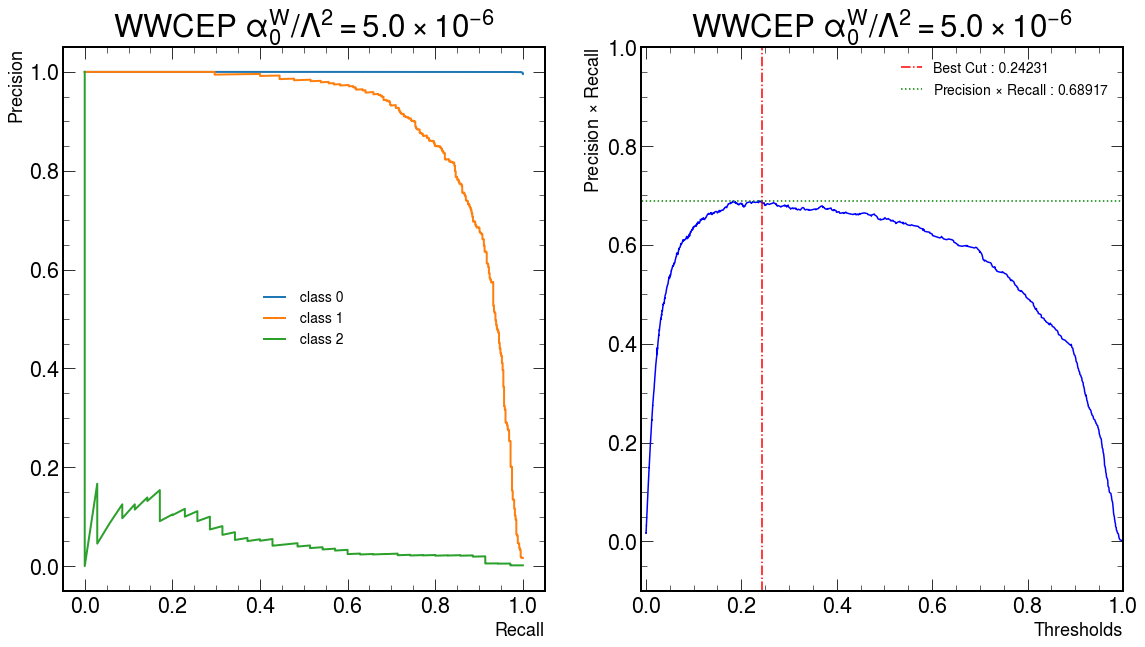

In [30]:
plot_precision_recall_curve(y_test8,predict_proba_LGBM8_binary_logloss_scale_pos_weight, r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $', 'Precision_Recal_Anomalo8' )


  Best Cut  0.5067363993807331 



'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


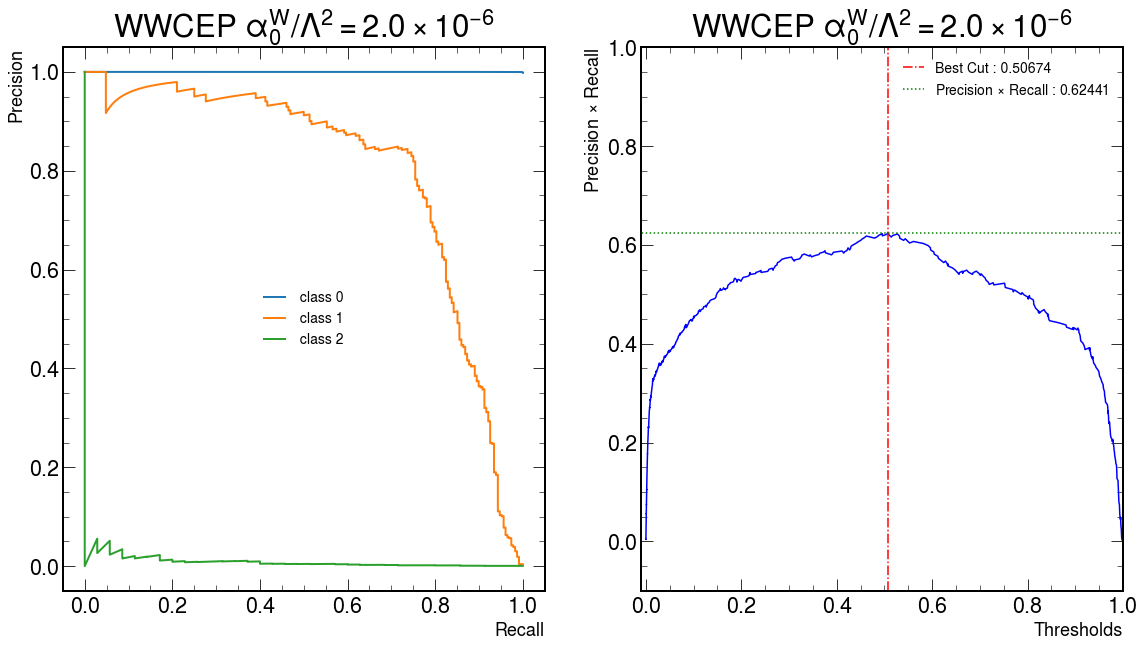

In [31]:
plot_precision_recall_curve(y_test7,predict_proba_LGBM7_binary_logloss_scale_pos_weight, r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', 'Precision_Recal_Anomalo7' )


  Best Cut  0.21486522209130934 



'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


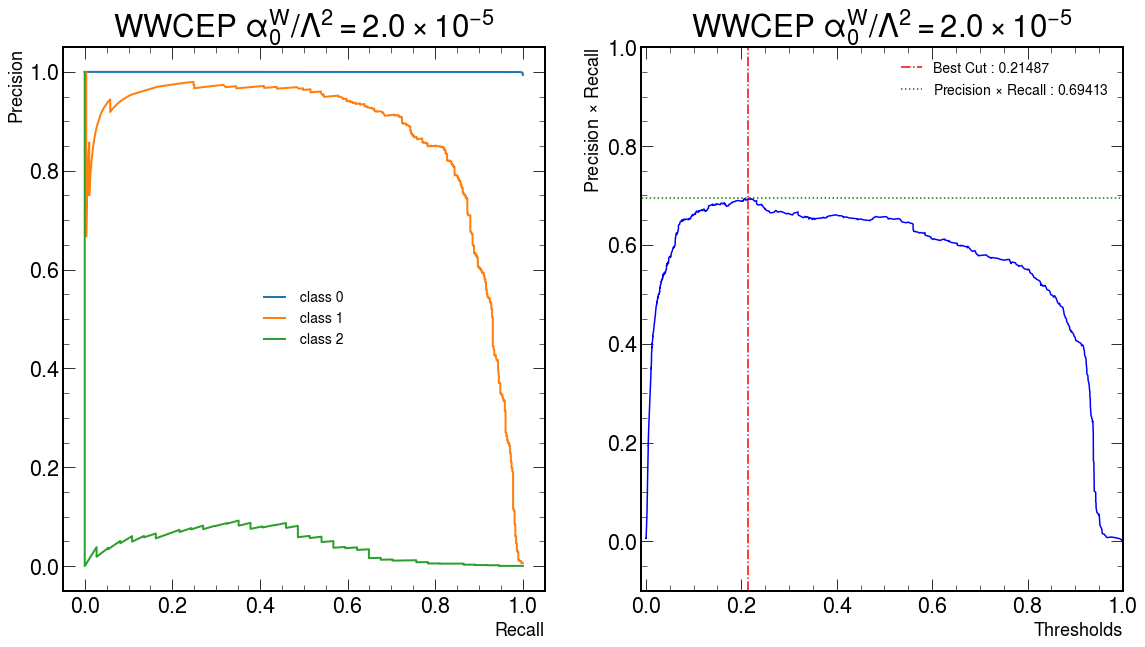

In [32]:
plot_precision_recall_curve(y_test1,predict_proba_LGBM1_binary_logloss_scale_pos_weight, r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-5} $', 'Precision_Recal_Anomalo1' )


  Best Cut  0.36197239947847265 



'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


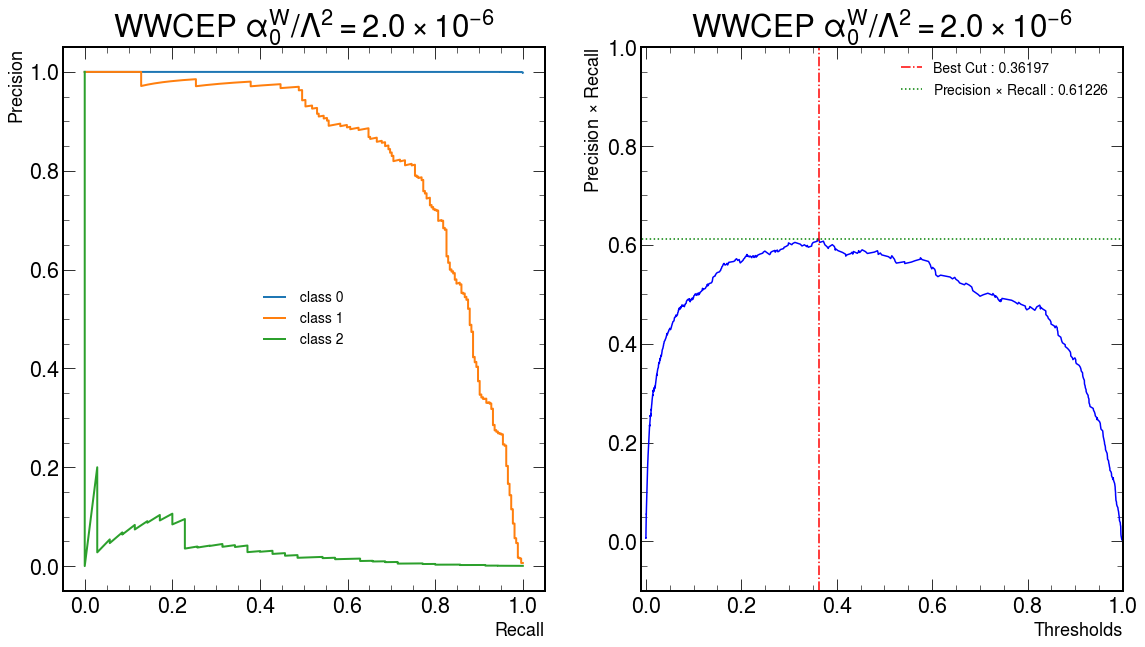

In [33]:
plot_precision_recall_curve(y_test4,predict_proba_LGBM4_binary_logloss_scale_pos_weight, r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', 'Precision_Recal_Anomalo4' )

In [34]:
def plot_probab( bst, predict, label, label_anomalo, weight_back, weight_sig, weight_SM, nome ):
    predict_dados = bst.predict(data_set_dados_multirp)[:,1]
    bins = 25
    plt.figure(figsize = (15,10))

    hbgt_lgb = plt.hist( predict[ label == 0 ][:,1], bins = np.linspace(0,1,bins), alpha=1, histtype = 'bar', color = 'pink', label = 'Background', weights = weight_back/test_size )
    plt.hist( predict[ label == 1 ][:,1], bins = np.linspace(0,1,bins), ls='-', linewidth=2.5, histtype = 'step', label = label_anomalo, weights = weight_sig/test_size, color = 'green' )
    plt.hist( predict[ label == 2 ][:,1], bins = np.linspace(0,1,bins), ls='--', linewidth=2.5, histtype = 'step', label = 'Standar Model', weights = weight_SM/test_size, color = 'blue' )

    uppery_lgb=np.max(hbgt_lgb[0])
    plt.plot( [ best_cut(label,predict),best_cut(label,predict)],[0,uppery_lgb],"-.r", linewidth=2.5,  label='Best cut : {:2.3f}'.format( best_cut(label,predict) ) )
  
    counts_1, bin_edges_1 = np.histogram( predict_dados[ predict_dados < best_cut(label,predict) ] , bins = np.linspace(0,1,bins) )
    errors_1 = np.sqrt( counts_1 )
    bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
    plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[1] - bin_centres_1[2])/2, fmt='.', label = 'Data-2016', color = 'black' )

    n_events_back_after_cut = predict[ label == 0 ][:,1] > best_cut( label, predict ) 
    n_events_signal_after_cut = predict[ label == 1 ][:,1] > best_cut(label,predict )
    n_events_SM_after_cut = predict[ label == 2 ][:,1] > best_cut(label,predict )

    print('Numero de eventos de background depois do corte -->', weight_back[ n_events_back_after_cut ].sum() / test_size )
    print('Numero de eventos de signal depois do corte -->', weight_sig[ n_events_signal_after_cut].sum() / test_size )
    print('Numero de eventos de SM depois do corte -->', weight_SM[ n_events_SM_after_cut ].sum() / test_size )

    plt.text(best_cut( label, predict )+0.1 , 10, 'Signal Region')    
    plt.xlabel( "Probability" )
    plt.ylabel( "Events" )
    plt.title( "Mangueira Plot" )
    plt.legend( loc = "best", fontsize = 16 )
    plt.yscale( 'log' )
    hep.cms.label( llabel="Preliminary", rlabel=r"$\mathcal{L} = 9.792\;fb^{-1}$", fontsize = 16 )
    plt.savefig( pwd_savefig+nome+'.pdf' )
    #plt.show()
    #plt.close()

Numero de eventos de background depois do corte --> 7.438661301015669
Numero de eventos de signal depois do corte --> 28.200758040904244
Numero de eventos de SM depois do corte --> 0.39646420075178596


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


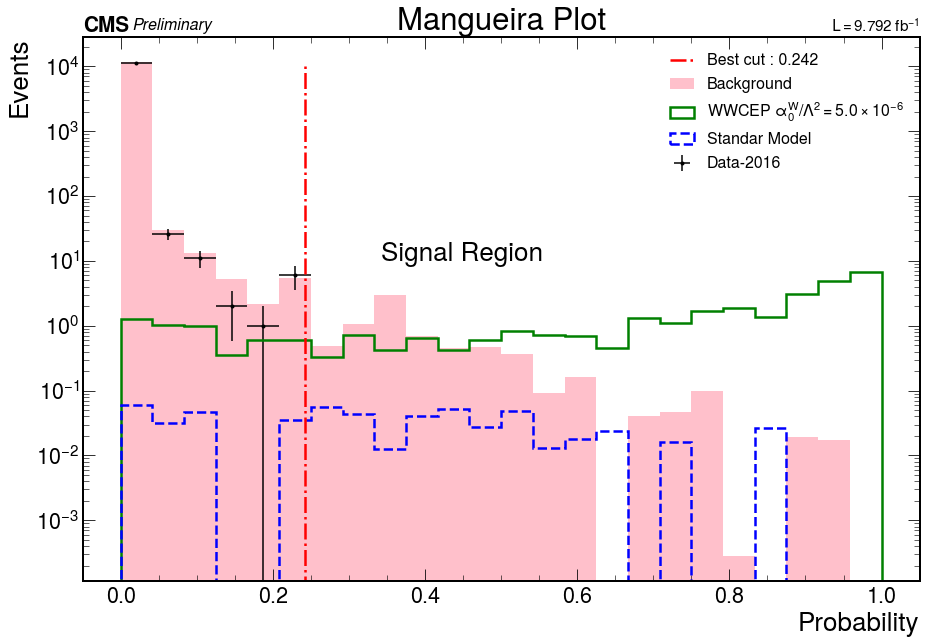

In [35]:
plot_probab(bst8_binary_logloss_scale_pos_weight, predict_proba_LGBM8_binary_logloss_scale_pos_weight, y_test8, r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $', DataSet_Test8_weight_backgr, DataSet_Test8_weight_signal, DataSet_TestSM8_weight_signal, 'Discriminante_Anomalo8' )

Numero de eventos de background depois do corte --> 2.1583139059838063
Numero de eventos de signal depois do corte --> 3.666015852649293
Numero de eventos de SM depois do corte --> 0.25390404220144713


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


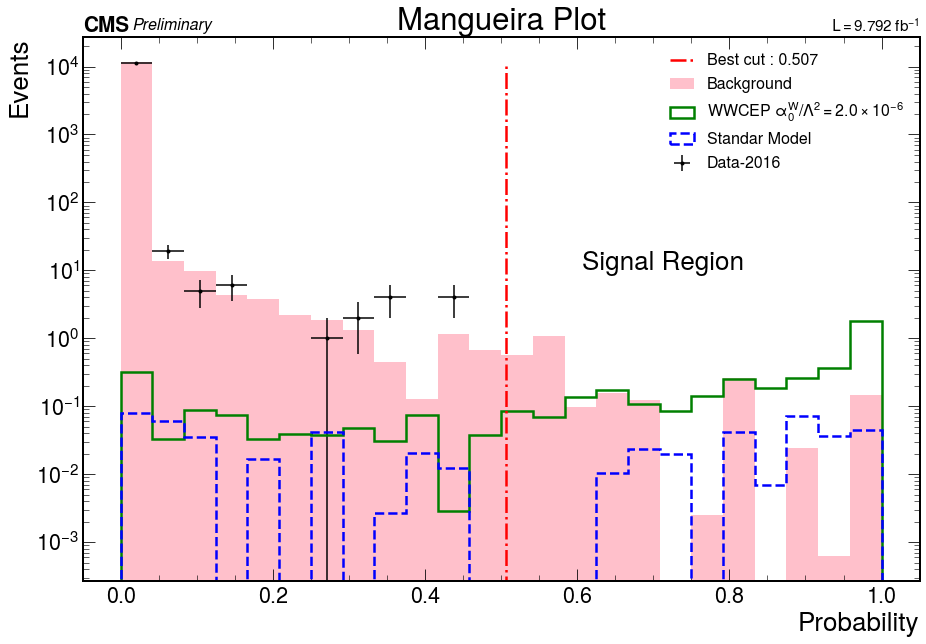

In [36]:
plot_probab(bst7_binary_logloss_scale_pos_weight, predict_proba_LGBM7_binary_logloss_scale_pos_weight, y_test7, r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', DataSet_Test7_weight_backgr, DataSet_Test7_weight_signal, DataSet_TestSM7_weight_signal, 'Discriminante_Anomalo7'  )

Numero de eventos de background depois do corte --> 9.754934292673253
Numero de eventos de signal depois do corte --> 30.4142304718577
Numero de eventos de SM depois do corte --> 0.43792676643524203


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


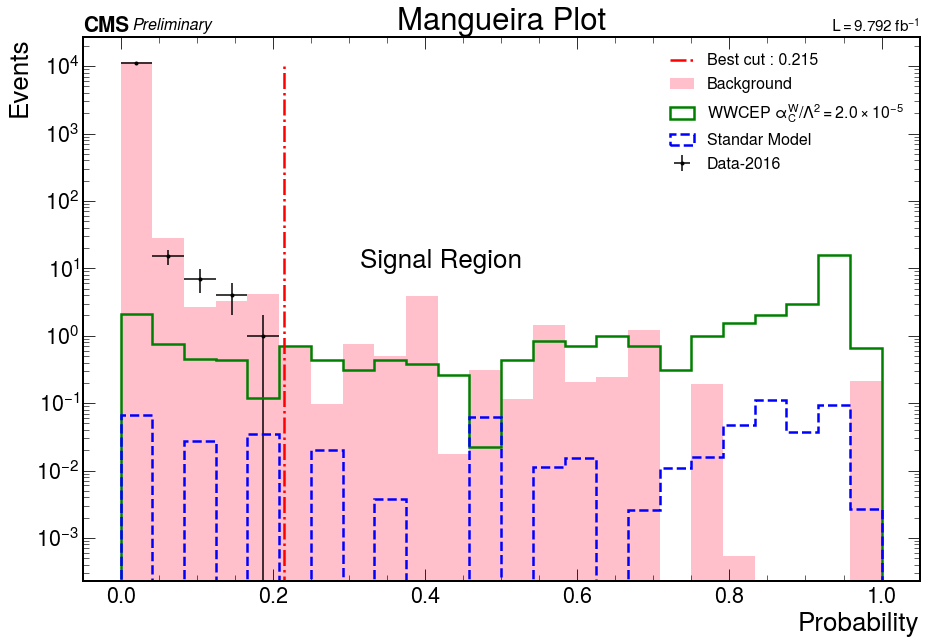

In [37]:
plot_probab(bst1_binary_logloss_scale_pos_weight, predict_proba_LGBM1_binary_logloss_scale_pos_weight, y_test1, r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 2.0 \times 10^{-5} $', DataSet_Test1_weight_backgr, DataSet_Test1_weight_signal, DataSet_TestSM1_weight_signal, 'Discriminante_Anomalo1'  )

Numero de eventos de background depois do corte --> 3.458608578051647
Numero de eventos de signal depois do corte --> 4.954608484941072
Numero de eventos de SM depois do corte --> 0.27131543152735965


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


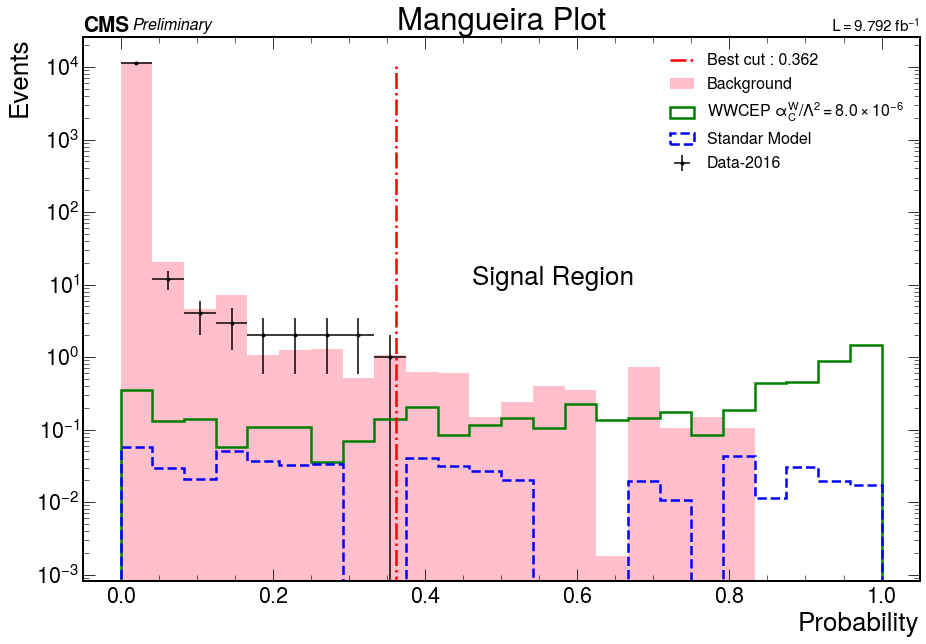

In [38]:
plot_probab(bst4_binary_logloss_scale_pos_weight, predict_proba_LGBM4_binary_logloss_scale_pos_weight, y_test4, r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 8.0 \times 10^{-6} $', DataSet_Test4_weight_backgr, DataSet_Test4_weight_signal, DataSet_TestSM4_weight_signal, 'Discriminante_Anomalo4'  )

In [39]:
DataSet_multiRP_DrellYan = open_file_MC( 'DataSet_multiRP_DrellYan.h5' )
DataSet_multiRP_QCD = open_file_MC( 'DataSet_multiRP_QCD.h5' )
DataSet_multiRP_single_top = open_file_MC( 'DataSet_multiRP_single_top.h5' )
DataSet_multiRP_TTbar = open_file_MC( 'DataSet_multiRP_TTbar.h5' )
DataSet_multiRP_VV_inclusivo = open_file_MC( 'DataSet_multiRP_VV_inclusivo.h5' )
DataSet_multiRP_WJets = open_file_MC( 'DataSet_multiRP_WJets.h5' )

In [40]:
select_columns = ['Mww', 'Pt_W_lep', 'dPhi_Whad_Wlep', 'dPhi_jatos_MET', 'jetAK8_pt','jetAK8_eta', 'jetAK8_prunedMass', 'jetAK8_tau21', 'METPt', 'muon_pt', 'muon_eta', 'ExtraTracks', 'Yww', 'xi1', 'xi2', 'Mx', 'Yx', 'Mww/Mx', 'Yww_Yx']

In [41]:
SM['class_predict8'] = ( bst8_binary_logloss_scale_pos_weight.predict( SM[select_columns] )[:,1] > best_cut( y_test8, predict_proba_LGBM8_binary_logloss_scale_pos_weight ) ).astype(int)
SM['class_predict7'] = ( bst7_binary_logloss_scale_pos_weight.predict( SM[select_columns] )[:,1] > best_cut( y_test7, predict_proba_LGBM7_binary_logloss_scale_pos_weight ) ).astype(int)
SM['class_predict1'] = ( bst1_binary_logloss_scale_pos_weight.predict( SM[select_columns] )[:,1] > best_cut( y_test1, predict_proba_LGBM1_binary_logloss_scale_pos_weight ) ).astype(int)
SM['class_predict4'] = ( bst4_binary_logloss_scale_pos_weight.predict( SM[select_columns] )[:,1] > best_cut( y_test4, predict_proba_LGBM4_binary_logloss_scale_pos_weight ) ).astype(int)

In [42]:
ANOMALO8['class_predict'] = ( bst8_binary_logloss_scale_pos_weight.predict( ANOMALO8[select_columns] )[:,1] > best_cut( y_test8, predict_proba_LGBM8_binary_logloss_scale_pos_weight ) ).astype(int)
ANOMALO7['class_predict'] = ( bst7_binary_logloss_scale_pos_weight.predict( ANOMALO7[select_columns] )[:,1] > best_cut( y_test7, predict_proba_LGBM7_binary_logloss_scale_pos_weight ) ).astype(int)
ANOMALO1['class_predict'] = ( bst1_binary_logloss_scale_pos_weight.predict( ANOMALO1[select_columns] )[:,1] > best_cut( y_test1, predict_proba_LGBM1_binary_logloss_scale_pos_weight ) ).astype(int)
ANOMALO4['class_predict'] = ( bst4_binary_logloss_scale_pos_weight.predict( ANOMALO4[select_columns] )[:,1] > best_cut( y_test4, predict_proba_LGBM4_binary_logloss_scale_pos_weight ) ).astype(int)

In [43]:
# Fazendo um dicionário de tal forma que pudesse alocar todos os anomalos numa mesma estrutura apenas para aqueles classificados como sinal (signal region)
labels_signals = [r'ANOMALO8', r'ANOMALO7', r'ANOMALO1',r'ANOMALO4']
df_signals_protons_multiRP_events_sigreg = {}
df_signals_protons_multiRP_events_sigreg[labels_signals[0]] = ANOMALO8[ ANOMALO8['class_predict'] == 1 ]
df_signals_protons_multiRP_events_sigreg[labels_signals[1]] = ANOMALO7[ ANOMALO7['class_predict'] == 1 ]
df_signals_protons_multiRP_events_sigreg[labels_signals[2]] = ANOMALO1[ ANOMALO1['class_predict'] == 1 ]
df_signals_protons_multiRP_events_sigreg[labels_signals[3]] = ANOMALO4[ ANOMALO4['class_predict'] == 1 ]

In [ ]:
# Fazendo um dicionário de tal forma que pudesse alocar todos os anomalos numa mesma estrutura apenas para aqueles classificados como sinal (signal region)
labels_signals = [r'ANOMALO8', r'ANOMALO7', r'ANOMALO1',r'ANOMALO4']
df_back_protons_multiRP_events_sigreg = {}
df_back_protons_multiRP_events_sigreg[labels_signals[0]] = ANOMALO8[ ANOMALO8['class_predict'] == 1 ]
df_back_protons_multiRP_events_sigreg[labels_signals[1]] = ANOMALO7[ ANOMALO7['class_predict'] == 1 ]
df_back_protons_multiRP_events_sigreg[labels_signals[2]] = ANOMALO1[ ANOMALO1['class_predict'] == 1 ]
df_back_protons_multiRP_events_sigreg[labels_signals[3]] = ANOMALO4[ ANOMALO4['class_predict'] == 1 ]

In [44]:
DataSet_multiRP_DrellYan['class_predict8'] = ( bst8_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_DrellYan[select_columns] )[:,1] > best_cut( y_test8, predict_proba_LGBM8_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_QCD['class_predict8'] = ( bst8_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_QCD[select_columns] )[:,1] > best_cut( y_test8, predict_proba_LGBM8_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_single_top['class_predict8'] = ( bst8_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_single_top[select_columns] )[:,1] > best_cut( y_test8, predict_proba_LGBM8_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_TTbar['class_predict8'] = ( bst8_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_TTbar[select_columns] )[:,1] > best_cut( y_test8, predict_proba_LGBM8_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_VV_inclusivo['class_predict8'] = ( bst8_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_VV_inclusivo[select_columns] )[:,1] > best_cut( y_test8, predict_proba_LGBM8_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_WJets['class_predict8'] = ( bst8_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_WJets[select_columns] )[:,1] > best_cut( y_test8, predict_proba_LGBM8_binary_logloss_scale_pos_weight ) ).astype(int)
data_set_back_multirp['class_predict8'] = ( bst8_binary_logloss_scale_pos_weight.predict( data_set_back_multirp[select_columns] )[:,1] > best_cut( y_test8, predict_proba_LGBM8_binary_logloss_scale_pos_weight ) ).astype(int)

DataSet_multiRP_DrellYan['class_predict7'] = ( bst7_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_DrellYan[select_columns])[:,1] > best_cut( y_test7, predict_proba_LGBM7_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_QCD['class_predict7'] = ( bst7_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_QCD[select_columns] )[:,1] > best_cut( y_test7, predict_proba_LGBM7_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_single_top['class_predict7'] = ( bst7_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_single_top[select_columns] )[:,1] > best_cut( y_test7, predict_proba_LGBM7_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_TTbar['class_predict7'] = ( bst7_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_TTbar[select_columns] )[:,1] > best_cut( y_test7, predict_proba_LGBM7_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_VV_inclusivo['class_predict7'] = ( bst7_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_VV_inclusivo[select_columns] )[:,1] > best_cut( y_test7, predict_proba_LGBM7_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_WJets['class_predict7'] = ( bst7_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_WJets[select_columns] )[:,1] > best_cut( y_test7, predict_proba_LGBM7_binary_logloss_scale_pos_weight ) ).astype(int)
data_set_back_multirp['class_predict7'] = ( bst7_binary_logloss_scale_pos_weight.predict( data_set_back_multirp[select_columns] )[:,1] > best_cut( y_test7, predict_proba_LGBM7_binary_logloss_scale_pos_weight ) ).astype(int)

DataSet_multiRP_DrellYan['class_predict1'] = ( bst1_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_DrellYan[select_columns] )[:,1] > best_cut( y_test1, predict_proba_LGBM1_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_QCD['class_predict1'] = ( bst1_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_QCD[select_columns] )[:,1] > best_cut( y_test1, predict_proba_LGBM1_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_single_top['class_predict1'] = ( bst1_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_single_top[select_columns] )[:,1] > best_cut( y_test1, predict_proba_LGBM1_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_TTbar['class_predict1'] = ( bst1_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_TTbar[select_columns] )[:,1] > best_cut( y_test1, predict_proba_LGBM1_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_VV_inclusivo['class_predict1'] = ( bst1_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_VV_inclusivo[select_columns] )[:,1] > best_cut( y_test1, predict_proba_LGBM1_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_WJets['class_predict1'] = ( bst1_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_WJets[select_columns] )[:,1] > best_cut( y_test1, predict_proba_LGBM1_binary_logloss_scale_pos_weight ) ).astype(int)
data_set_back_multirp['class_predict1'] = ( bst1_binary_logloss_scale_pos_weight.predict( data_set_back_multirp[select_columns]  )[:,1] > best_cut( y_test1, predict_proba_LGBM1_binary_logloss_scale_pos_weight ) ).astype(int)

DataSet_multiRP_DrellYan['class_predict4'] = ( bst4_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_DrellYan[select_columns] )[:,1] > best_cut( y_test4, predict_proba_LGBM4_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_QCD['class_predict4'] = ( bst4_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_QCD[select_columns] )[:,1] > best_cut( y_test4, predict_proba_LGBM4_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_single_top['class_predict4'] = ( bst4_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_single_top[select_columns] )[:,1] > best_cut( y_test4, predict_proba_LGBM4_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_TTbar['class_predict4'] = ( bst4_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_TTbar[select_columns] )[:,1] > best_cut( y_test4, predict_proba_LGBM4_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_VV_inclusivo['class_predict4'] = ( bst4_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_VV_inclusivo[select_columns] )[:,1] > best_cut( y_test4, predict_proba_LGBM4_binary_logloss_scale_pos_weight ) ).astype(int)
DataSet_multiRP_WJets['class_predict4'] = ( bst4_binary_logloss_scale_pos_weight.predict( DataSet_multiRP_WJets[select_columns] )[:,1] > best_cut( y_test4, predict_proba_LGBM4_binary_logloss_scale_pos_weight ) ).astype(int)
data_set_back_multirp['class_predict4'] = ( bst4_binary_logloss_scale_pos_weight.predict( data_set_back_multirp[select_columns] )[:,1] > best_cut( y_test4, predict_proba_LGBM4_binary_logloss_scale_pos_weight ) ).astype(int)

In [45]:
data_set_dados_multirp['class_predict8'] = ( bst8_binary_logloss_scale_pos_weight.predict( data_set_dados_multirp[select_columns] )[:,1] > best_cut( y_test8, predict_proba_LGBM8_binary_logloss_scale_pos_weight ) ).astype(int)
data_set_dados_multirp['class_predict7'] = ( bst7_binary_logloss_scale_pos_weight.predict( data_set_dados_multirp[select_columns] )[:,1] > best_cut( y_test7, predict_proba_LGBM7_binary_logloss_scale_pos_weight ) ).astype(int)
data_set_dados_multirp['class_predict1'] = ( bst1_binary_logloss_scale_pos_weight.predict( data_set_dados_multirp[select_columns] )[:,1] > best_cut( y_test1, predict_proba_LGBM1_binary_logloss_scale_pos_weight ) ).astype(int)
data_set_dados_multirp['class_predict4'] = ( bst4_binary_logloss_scale_pos_weight.predict( data_set_dados_multirp[select_columns] )[:,1] > best_cut( y_test4, predict_proba_LGBM4_binary_logloss_scale_pos_weight ) ).astype(int)

# Método ABCD

# Estiamando o Background

A partir das duas variáveis $ \left (  \dfrac{M_{WW}}{M_{PPS}} - 1  \;\; \text{e} \;\; Y_{WW} - Y_{PPS} \right ) $ que têm distribuições não correlacionadas para o background. Um corte em cada uma dessas variáveis terá uma eficiência independente de quaisquer seleções feitas na outra variável. Digamos que dividamos o plano 2D em quatro regiões (A, B, C, D) sendo A a região do sinal final onde os requisitos de seleção das variáveis são aplicados.

Se as seleções são de fato não correlacionadas para o background, então pode-se supor que a proporção de eventos em cada região pode ser relacionada como: 

$$
\dfrac{ N_{A}^{bkg} }{ N_{B}^{bkg} } = \dfrac{ N_{C}^{bkg} }{ N_{D}^{bkg} } \Leftrightarrow N_{A}^{bkg} = N_{B}^{bkg} \cdot \dfrac{N_{C}^{bkg}}{N_{D}^{bkg}}
$$

## Para as amostras de Background

Number of events for background: 11798.773419582594
Number of events (A): 762.4335880130172
Number of events (B): 2733.5117834599714
Number of events (C): 2004.5158914754181
Number of events (D): 6298.312156634187 



'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


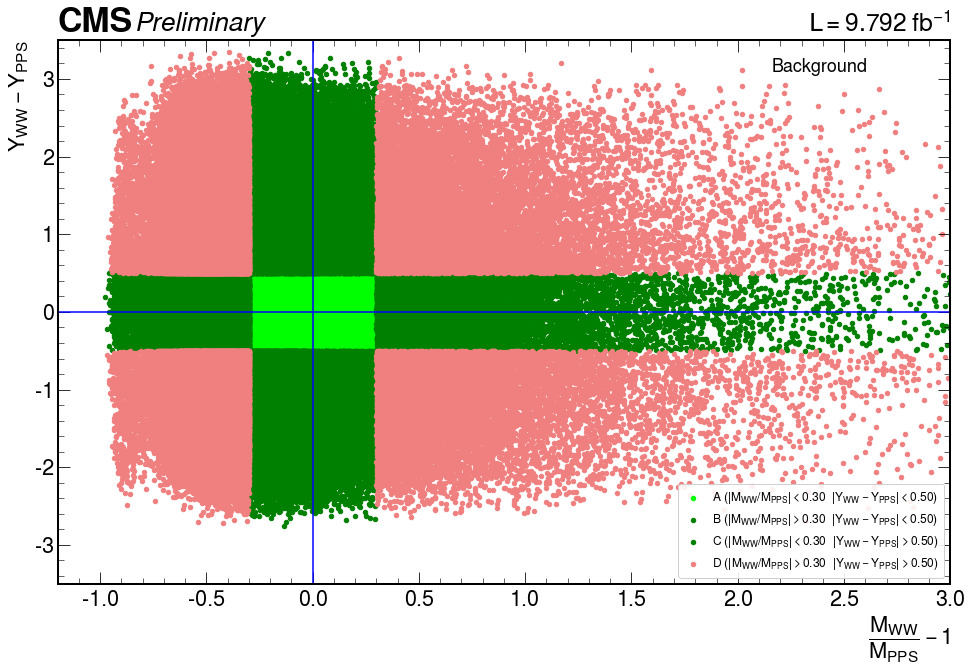

In [60]:
df_protons_multiRP_bkg_events = data_set_back_multirp
df_protons_multiRP_bkg_events['shiftedRatioMWW_MX'] =  df_protons_multiRP_bkg_events[ "Mww/Mx" ] - 1 
df_protons_multiRP_bkg_events['diffYWW_YX'] = df_protons_multiRP_bkg_events['Yww_Yx'] 

cutMww_Mx = 0.30
cutYww_Yx = 0.50 

msk_bkg_cut1 = ( np.abs( df_protons_multiRP_bkg_events[ "shiftedRatioMWW_MX" ] ) <= cutMww_Mx )
msk_bkg_cut2 = ( np.abs( df_protons_multiRP_bkg_events[ "diffYWW_YX" ] ) <= cutYww_Yx )
msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

n_events_bkg   = np.sum( df_protons_multiRP_bkg_events[ "PUWeight" ] * df_protons_multiRP_bkg_events[ "Norm_MC" ] * df_protons_multiRP_bkg_events[ "weight" ]  )
n_events_bkg_A = np.sum( df_protons_multiRP_bkg_events[ msk_bkg_A ][ "PUWeight" ] * df_protons_multiRP_bkg_events[ msk_bkg_A ][ "Norm_MC" ] * df_protons_multiRP_bkg_events[ msk_bkg_A ][ "weight" ] )
n_events_bkg_B = np.sum( df_protons_multiRP_bkg_events[ msk_bkg_B ][ "PUWeight" ] * df_protons_multiRP_bkg_events[ msk_bkg_B ][ "Norm_MC" ] * df_protons_multiRP_bkg_events[ msk_bkg_B ][ "weight" ])
n_events_bkg_C = np.sum( df_protons_multiRP_bkg_events[ msk_bkg_C ][ "PUWeight" ] * df_protons_multiRP_bkg_events[ msk_bkg_C ][ "Norm_MC" ] * df_protons_multiRP_bkg_events[ msk_bkg_C ][ "weight" ])
n_events_bkg_D = np.sum( df_protons_multiRP_bkg_events[ msk_bkg_D ][ "PUWeight" ] * df_protons_multiRP_bkg_events[ msk_bkg_D ][ "Norm_MC" ] * df_protons_multiRP_bkg_events[ msk_bkg_D ][ "weight" ])

print ( "Number of events for background: {}".format( n_events_bkg ) )
print ( "Number of events (A): {}".format( n_events_bkg_A ) )
print ( "Number of events (B): {}".format( n_events_bkg_B ) )
print ( "Number of events (C): {}".format( n_events_bkg_C ) )
print ( "Number of events (D): {}".format( n_events_bkg_D ), '\n')

x_min = -1.2
x_max = 3.
y_min = -3.5
y_max =  3.5
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(16,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='blue' )
plt.plot( (0,0), (y_min,y_max), color='blue' )
ax = plt.gca()
label_str_ = r"A ($|M_{WW} / M_{PPS}| < 0.30$  $|Y_{WW} - Y_{PPS}| < 0.50$)"
df_protons_multiRP_bkg_events[ msk_bkg_A ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lime', label=label_str_ )
label_str_ = r"B ($|M_{WW} / M_{PPS}| > 0.30$  $|Y_{WW} - Y_{PPS}| < 0.50$)"
df_protons_multiRP_bkg_events[ msk_bkg_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='green', label=label_str_ )
label_str_ = r"C ($|M_{WW} / M_{PPS}| < 0.30$  $|Y_{WW} - Y_{PPS}| > 0.50$)"
df_protons_multiRP_bkg_events[ msk_bkg_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='green', label=label_str_ )
label_str_ = r"D ($|M_{WW} / M_{PPS}| > 0.30$  $|Y_{WW} - Y_{PPS}| > 0.50$)"
df_protons_multiRP_bkg_events[ msk_bkg_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral', label=label_str_ )
plt.legend( loc='best', fontsize=12, framealpha=0.9, frameon=True, fancybox=True )
ax.text( 0.80, 0.95, "Background", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel( r"$\dfrac{M_{WW}}{M_{PPS}} - 1$", fontsize=22 )
plt.ylabel( r"$Y_{WW} - Y_{PPS}$", fontsize=22 )
hep.cms.label(llabel="Preliminary", rlabel=r"$\mathcal{L} = 9.792\;fb^{-1}$" )
plt.savefig( pwd_savefig+'ABCD_multiRP_bkg_events.pdf' )
#plt.show()
#plt.close()

## Para os Dados

Number of events for Data (B): 3008 - Ratio: 22.00831924852793
Number of events for Data (C): 1617 - Ratio: 16.13357127151346
Number of events for Data (D): 6040 - Ratio: 19.179741650746543 



'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


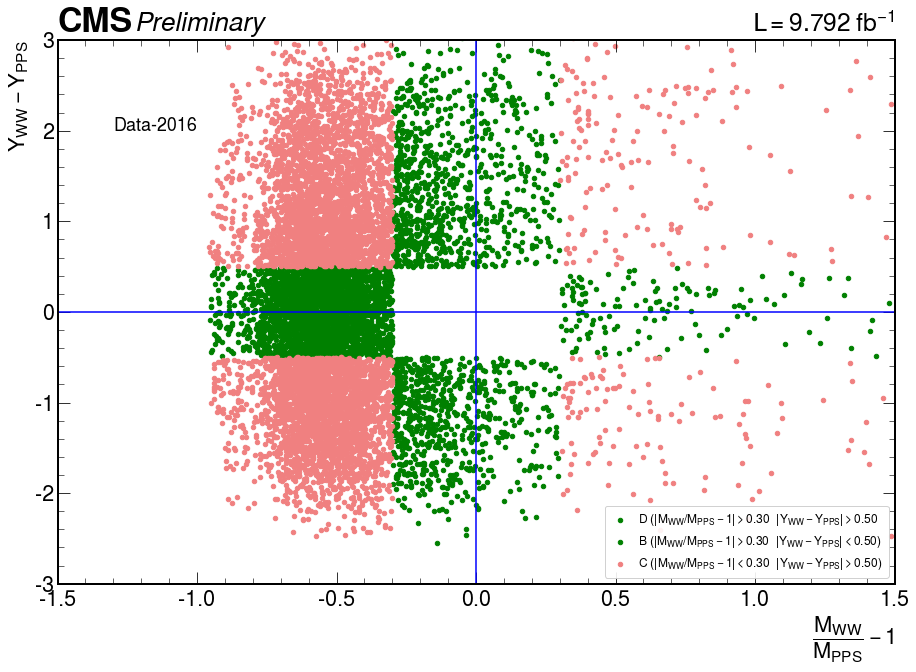

In [68]:
df_protons_multiRP_data_events = data_set_dados_multirp
df_protons_multiRP_data_events['shiftedRatioMWW_MX'] =  df_protons_multiRP_data_events[ "Mww/Mx" ] - 1 
df_protons_multiRP_data_events['diffYWW_YX'] = df_protons_multiRP_data_events['Yww_Yx'] 


msk_data_cut1 = ( np.abs( df_protons_multiRP_data_events[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_data_cut2 = ( np.abs( df_protons_multiRP_data_events[ "diffYWW_YX" ] ) <= 0.50 )
msk_data_A =  msk_data_cut1 &  msk_data_cut2
msk_data_B = ~msk_data_cut1 &  msk_data_cut2
msk_data_C =  msk_data_cut1 & ~msk_data_cut2
msk_data_D = ~msk_data_cut1 & ~msk_data_cut2
msk_data = ~msk_data_A


n_events_data_B = df_protons_multiRP_data_events[ msk_data_B ].shape[0]
n_events_data_C = df_protons_multiRP_data_events[ msk_data_C ].shape[0]
n_events_data_D = df_protons_multiRP_data_events[ msk_data_D ].shape[0]
resample_factor = 20
print ( "Number of events for Data (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B / resample_factor ) ) ) )
print ( "Number of events for Data (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C / resample_factor ) ) ) )
print ( "Number of events for Data (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D / resample_factor ) ) ), '\n' )


x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(15,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='blue' )
plt.plot( (x_center,x_center), (y_min,y_max), color='blue' )
ax = plt.gca()
df_protons_multiRP_data_events[ msk_data_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='green', label = label_str_ )
label_str_ = r"B ($|M_{WW} / M_{PPS} - 1| > 0.30$  $|Y_{WW} - Y_{PPS}| < 0.50$)"
df_protons_multiRP_data_events[ msk_data_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='green', label = label_str_ )
label_str_ = r"C ($|M_{WW} / M_{PPS} - 1| < 0.30$  $|Y_{WW} - Y_{PPS}| > 0.50$)"
df_protons_multiRP_data_events[ msk_data_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral', label = label_str_ )
label_str_ = r"D ($|M_{WW} / M_{PPS} - 1| > 0.30$  $|Y_{WW} - Y_{PPS}| > 0.50$"
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel( r"$\dfrac{M_{WW}}{ M_{PPS} } - 1$", fontsize=22 )
plt.ylabel( r"$Y_{WW} - Y_{PPS}$", fontsize=22 )
plt.legend( loc='best', fontsize=12, framealpha=0.9, frameon=True, fancybox=True )
ax.text( -1.3, 2, "Data-2016", fontsize=18 )
hep.cms.label(llabel="Preliminary", rlabel=r"$\mathcal{L} = 9.792\;fb^{-1}$" )
plt.savefig( pwd_savefig+'ABCD_multiRP_data_events.pdf' )
#plt.show()
#plt.close()

## Para os eventos de background na região de Background após o resultado da classificação do LightGBM com o anômalo 8

Number of events of the background on Signal Region: 11784.382197008266
Number of events (A): 759.9421589641242
Number of events (B): 2732.6313040835803
Number of events (C): 2000.210788789995
Number of events (D): 6291.59794517057 



'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


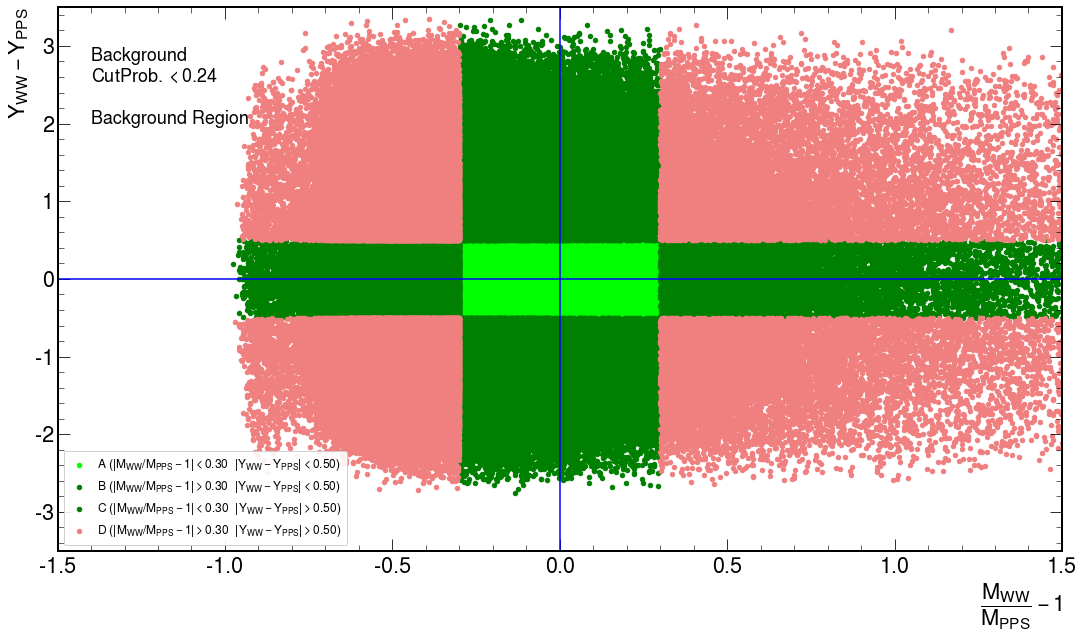

In [112]:
df_protons_multiRP_bkg_events_bkgreg = df_protons_multiRP_bkg_events[ df_protons_multiRP_bkg_events[ 'class_predict1' ] == 0 ]

msk_bkg_cut1 = ( np.abs( df_protons_multiRP_bkg_events_bkgreg[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_bkg_cut2 = ( np.abs( df_protons_multiRP_bkg_events_bkgreg[ "diffYWW_YX" ] ) <= 0.50 )
msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

n_events_bkg_bkgreg   = np.sum( df_protons_multiRP_bkg_events_bkgreg[ "PUWeight" ] * df_protons_multiRP_bkg_events_bkgreg[ "Norm_MC" ] * df_protons_multiRP_bkg_events_bkgreg[ "weight" ])
n_events_bkg_bkgreg_A = np.sum( df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_A ][ "PUWeight" ] * df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_A ][ "Norm_MC" ] * df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_A ][ "weight" ] )
n_events_bkg_bkgreg_B = np.sum( df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_B ][ "PUWeight" ] * df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_B ][ "Norm_MC" ] * df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_B ][ "weight" ]  )
n_events_bkg_bkgreg_C = np.sum( df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_C ][ "PUWeight" ] * df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_C ][ "Norm_MC" ] * df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_C ][ "weight" ] )
n_events_bkg_bkgreg_D = np.sum( df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_D ][ "PUWeight" ] * df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_D ][ "Norm_MC" ] * df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_D ][ "weight" ])

print ( "Number of events of the background on Signal Region: {}".format( n_events_bkg_bkgreg ) )
print ( "Number of events (A): {}".format( n_events_bkg_bkgreg_A ) )
print ( "Number of events (B): {}".format( n_events_bkg_bkgreg_B ) )
print ( "Number of events (C): {}".format( n_events_bkg_bkgreg_C ) )
print ( "Number of events (D): {}".format( n_events_bkg_bkgreg_D ),'\n' )

x_min = -1.5
x_max =  1.5
y_min = -3.5
y_max =  3.5
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(18,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='blue' )
plt.plot( (x_center,x_center), (y_min,y_max), color='blue' )
ax = plt.gca()
label_str_ = r"A ($|M_{WW} / M_{PPS} - 1| < 0.30$  $|Y_{WW} - Y_{PPS}| < 0.50$)"
df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_A ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lime', label=label_str_ )
label_str_ = r"B ($|M_{WW} / M_{PPS} - 1| > 0.30$  $|Y_{WW} - Y_{PPS}| < 0.50$)"
df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='green', label=label_str_ )
label_str_ = r"C ($|M_{WW} / M_{PPS} - 1| < 0.30$  $|Y_{WW} - Y_{PPS}| > 0.50$)"
df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='green', label=label_str_ )
label_str_ = r"D ($|M_{WW} / M_{PPS} - 1| > 0.30$  $|Y_{WW} - Y_{PPS}| > 0.50$)"
df_protons_multiRP_bkg_events_bkgreg[ msk_bkg_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral', label=label_str_ )
plt.legend( loc='best', fontsize=12, framealpha=0.9, frameon=True, fancybox=True )
title_str_ = "Background \n$\\rm{{Cut Prob.}} < {:.2f}$\n\nBackground Region".format( best_cut(y_test8,predict_proba_LGBM8_binary_logloss_scale_pos_weight) )
title_str_ = r"{}".format( title_str_ )
ax.text( -1.4, 2, title_str_, fontsize=18 )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.title(r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $')
plt.xlabel( r"$\dfrac{M_{WW}}{M_{PPS}} - 1$", fontsize=22 )
plt.ylabel( r"$Y_{WW} - Y_{PPS}$", fontsize=22 )
plt.savefig( pwd_savefig+'ABCD_multiRP_bkg_events_BACKGROUND_REGION.pdf' )
#plt.show()
#plt.close()

## Para o Background na Região de Signal 

ANOMALO8
Number of events: 7.414397409336559 +/- 1.3135211309813657
Number of events (A): 1.4814597743742772 +/- 0.3725764937567984
Number of events (B): 1.1778460702923041 +/- 0.25443352342526493
Number of events (C): 1.8672930805460435 +/- 0.3765156646267915
Number of events (D): 2.887798484123935 +/- 1.1747442505849972
0 0


/home/matheus/miniconda3/envs/root_/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


ANOMALO7
Number of events: 1.9109707830100044 +/- 0.5050495162129603
Number of events (A): 0.42136827593252424 +/- 0.22762409313034915
Number of events (B): 0.28822578124804416 +/- 0.12476789624021772
Number of events (C): 0.5165111469502736 +/- 0.25124217325992954
Number of events (D): 0.6848655788791626 +/- 0.35294847853043554
0 1


/home/matheus/miniconda3/envs/root_/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.
No handles with labels found to put in legend.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


ANOMALO1
Number of events: 14.391222574325202 +/- 2.191287067971907
Number of events (A): 2.491429048893088 +/- 1.0208207982531827
Number of events (B): 0.8804793763916363 +/- 0.3177449764618355
Number of events (C): 4.305102685423143 +/- 0.9625606286941952
Number of events (D): 6.714211463617336 +/- 1.6529304516935233
1 0


/home/matheus/miniconda3/envs/root_/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


ANOMALO4
Number of events: 1.4443790123650393 +/- 0.3426408197516123
Number of events (A): 0.3702516763939848 +/- 0.21889115112434618
Number of events (B): 0.3247452179078382 +/- 0.11376667399763954
Number of events (C): 0.31509431517073516 +/- 0.15994366099811602
Number of events (D): 0.43428780289248115 +/- 0.175967509823689
1 1


/home/matheus/miniconda3/envs/root_/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


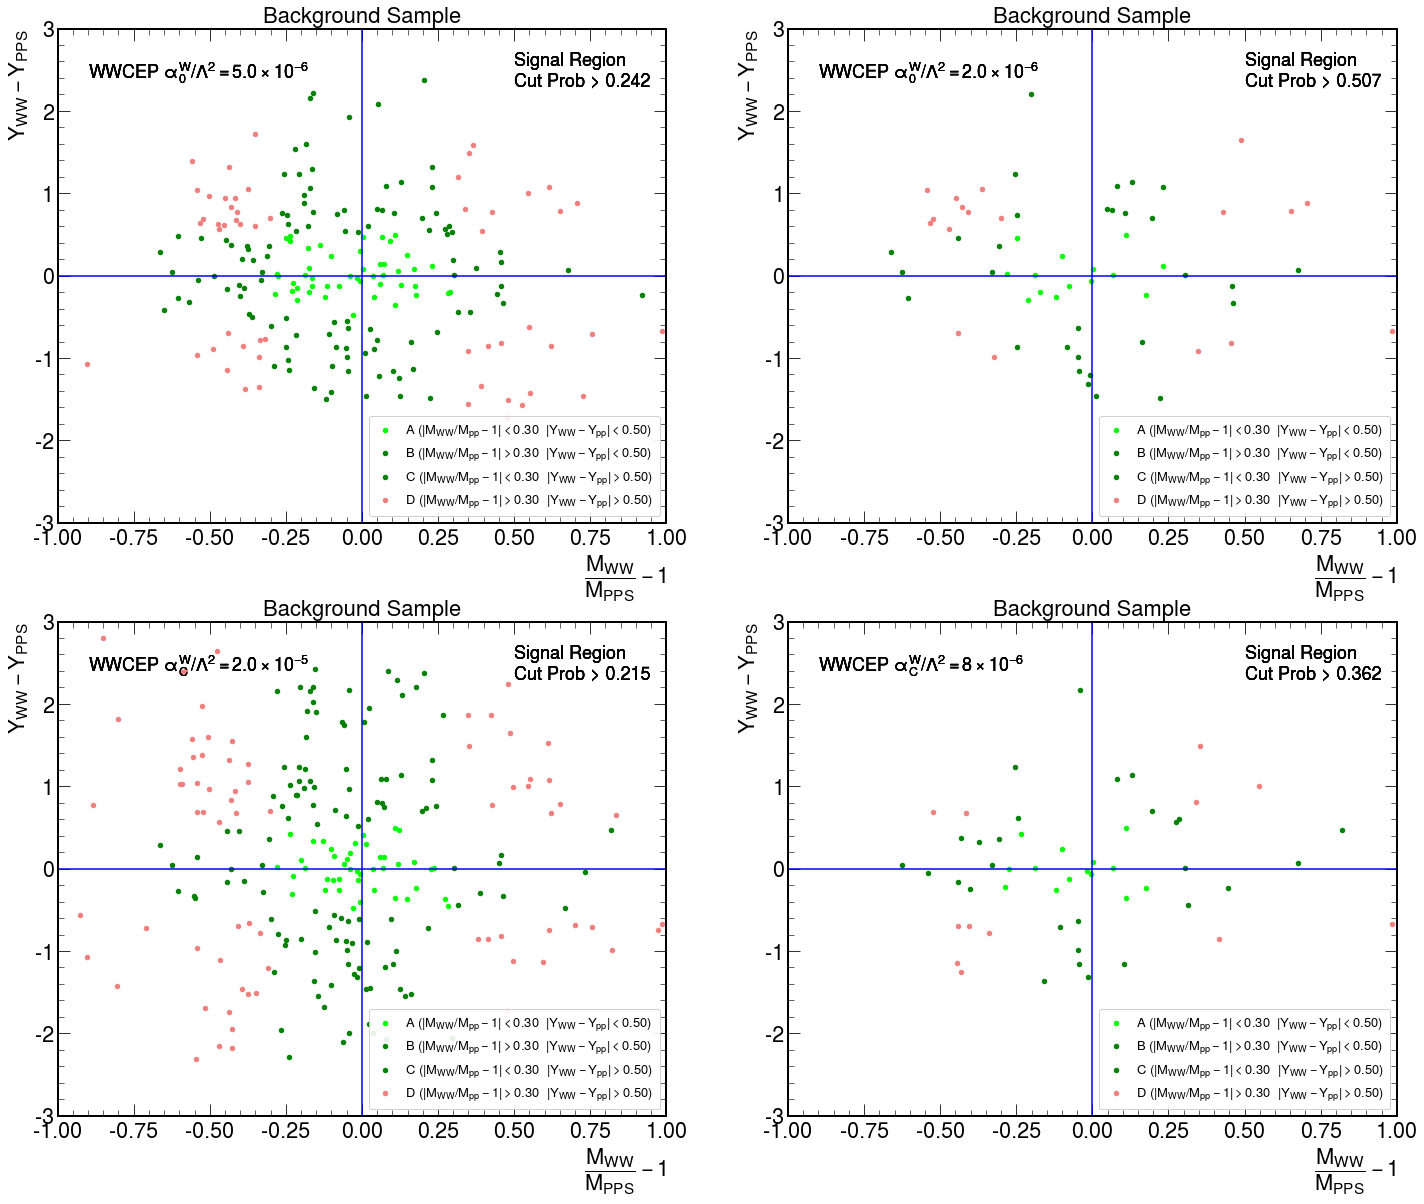

In [110]:
labels_signals = [r'ANOMALO8', r'ANOMALO7', r'ANOMALO1',r'ANOMALO4']
df_protons_multiRP_bkg_events_sigreg = {}
df_protons_multiRP_bkg_events_sigreg[labels_signals[0]] = data_set_back_multirp[ data_set_back_multirp['class_predict8'] == 1 ]
df_protons_multiRP_bkg_events_sigreg[labels_signals[1]] = data_set_back_multirp[ data_set_back_multirp['class_predict7'] == 1 ]
df_protons_multiRP_bkg_events_sigreg[labels_signals[2]] = data_set_back_multirp[ data_set_back_multirp['class_predict1'] == 1 ]
df_protons_multiRP_bkg_events_sigreg[labels_signals[3]] = data_set_back_multirp[ data_set_back_multirp['class_predict4'] == 1 ]

labels_samples = [
    r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $',
    r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $',
    r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=2.0 \times 10^{-5}$',
    r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=8 \times 10^{-6}$' ]

nrows_ = ( int( len(labels_signals)/2 ) + 1 if ( len(labels_signals) % 2 ) > 0 else  int( len(labels_signals)/2 ) )
fig, axes = plt.subplots( nrows_, 2, figsize=(24,nrows_*10) )

row_ = 0
col_ = 0
for label_ in labels_signals:
    print ( label_ )
    
    df_protons_multiRP_bkg_events_sigreg[ label_ ]['shiftedRatioMWW_MX'] = df_protons_multiRP_bkg_events_sigreg[ label_ ]['Mww/Mx'] - 1
    msk_sig_cut1 = ( np.abs( df_protons_multiRP_bkg_events_sigreg[ label_ ][ "shiftedRatioMWW_MX" ] ) <= 0.30 )
    msk_sig_cut2 = ( np.abs( df_protons_multiRP_bkg_events_sigreg[ label_ ][ "Yww_Yx" ] ) <= 0.50 )
    msk_sig_A =  msk_sig_cut1 &  msk_sig_cut2
    msk_sig_B = ~msk_sig_cut1 &  msk_sig_cut2
    msk_sig_C =  msk_sig_cut1 & ~msk_sig_cut2
    msk_sig_D = ~msk_sig_cut1 & ~msk_sig_cut2

    n_events_sig   = np.sum( df_protons_multiRP_bkg_events_sigreg[ label_ ][ "PUWeight" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ "Norm_MC" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ "weight" ] )
    err_n_events_sig = np.sqrt( np.sum( np.square( df_protons_multiRP_bkg_events_sigreg[ label_ ][ "PUWeight" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ "Norm_MC" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ "weight" ] ) ) )
    n_events_sig_A = np.sum( df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_A ][ "PUWeight" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_A ][ "Norm_MC" ]  * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_A ][ "weight" ] )
    err_n_events_sig_A = np.sqrt( np.sum( np.square( df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_A ][ "PUWeight" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_A ][ "Norm_MC" ]  * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_A ][ "weight" ]  ) ) )
    n_events_sig_B = np.sum( df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_B ][ "PUWeight" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_B ][ "Norm_MC" ] *df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_B ][ "weight" ] )
    err_n_events_sig_B = np.sqrt( np.sum( np.square( df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_B ][ "PUWeight" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_B ][ "Norm_MC" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_B ][ "weight" ] ) ) )
    n_events_sig_C = np.sum( df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_C ][ "PUWeight" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_C ][ "Norm_MC" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_C ][ "weight" ] )
    err_n_events_sig_C = np.sqrt( np.sum( np.square( df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_C ][ "PUWeight" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_C ][ "Norm_MC" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_C ][ "weight" ] ) ) )
    n_events_sig_D = np.sum( df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_D ][ "PUWeight" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_D ][ "Norm_MC" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_D ][ "weight" ] )
    err_n_events_sig_D = np.sqrt( np.sum( np.square(  df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_D ][ "PUWeight" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_D ][ "Norm_MC" ] * df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_D ][ "weight" ] ) ) )

    print ( "Number of events: {} +/- {}".format( n_events_sig, err_n_events_sig ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_sig_A, err_n_events_sig_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_sig_B, err_n_events_sig_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_sig_C, err_n_events_sig_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_sig_D, err_n_events_sig_D ) )

    x_min = -1.0
    x_max =  1.0
    y_min = -3.0
    y_max =  3.0
    x_center = ( x_min + x_max ) / 2.
    y_center = ( y_min + y_max ) / 2.

    print ( row_, col_ )
    axes[ row_, col_ ].plot( (x_min,x_max), (y_center,y_center), color='blue' )
    axes[ row_, col_ ].plot( (x_center,x_center), (y_min,y_max), color='blue' )
    if np.sum( msk_sig_A ) > 0:
        label_str_ = r"A ($|M_{WW} / M_{pp} - 1| < 0.30$  $|Y_{WW} - Y_{pp}| < 0.50$)"
        df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_A ].plot( "shiftedRatioMWW_MX", "Yww_Yx", 'scatter', ax=axes[ row_, col_ ], color='lime', label = label_str_ )
    if np.sum( msk_sig_B ) > 0:
        label_str_ = r"B ($|M_{WW} / M_{pp} - 1| > 0.30$  $|Y_{WW} - Y_{pp}| < 0.50$)"
        df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_B ].plot( "shiftedRatioMWW_MX", "Yww_Yx", 'scatter', ax=axes[ row_, col_ ], color='green', label = label_str_ )
    if np.sum( msk_sig_C ) > 0:
        label_str_ = r"C ($|M_{WW} / M_{pp} - 1| < 0.30$  $|Y_{WW} - Y_{pp}| > 0.50$)"
        df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_C ].plot( "shiftedRatioMWW_MX", "Yww_Yx", 'scatter', ax=axes[ row_, col_ ], color='green', label = label_str_ )
    if np.sum( msk_sig_D ) > 0:
        label_str_ = r"D ($|M_{WW} / M_{pp} - 1| > 0.30$  $|Y_{WW} - Y_{pp}| > 0.50$)"
        df_protons_multiRP_bkg_events_sigreg[ label_ ][ msk_sig_D ].plot( "shiftedRatioMWW_MX", "Yww_Yx", 'scatter', ax=axes[ row_, col_ ], color='lightcoral', label = label_str_ )
    #title_str_ = "{}\n$\\rm{{Prob.}} > {:.2f}$".format( labels_samples[ label_ ], prob_cut )
    #title_str_ = r"{}".format( title_str_ )
    #axes[ row_, col_ ].text( 0.70, 0.92, title_str_, horizontalalignment='left', verticalalignment='center', transform=axes[ row_, col_ ].transAxes, fontsize=18 )
    axes[ row_, col_ ].set_xlim(x_min, x_max)
    axes[ row_, col_ ].set_ylim(y_min, y_max)
    axes[ row_, col_ ].set_xlabel( r"$\dfrac{M_{WW}}{M_{PPS}} - 1$", fontsize=22 )
    axes[ row_, col_ ].set_ylabel( r"$Y_{WW} - Y_{PPS}$", fontsize=22 )
    axes[ row_, col_ ].set_title( "Background Sample", fontsize=22 )
    axes[ 0 , 0].text( -0.9, 2.4 , labels_samples[0], fontsize=18)
    axes[ 0 , 0].text( 0.5, 2.3 , 'Signal Region\nCut Prob > {:2.3f}'.format(best_cut(y_test8,predict_proba_LGBM8_binary_logloss_scale_pos_weight)), fontsize=18) 
    axes[ 0 , 1].text( -0.9, 2.4 , labels_samples[1], fontsize=18)
    axes[ 0 , 1].text( 0.5, 2.3 , 'Signal Region\nCut Prob > {:2.3f}'.format(best_cut(y_test7,predict_proba_LGBM7_binary_logloss_scale_pos_weight)), fontsize=18)
    axes[ 1 , 0].text( -0.9, 2.4 , labels_samples[2], fontsize=18)
    axes[ 1 , 0].text( 0.5, 2.3 , 'Signal Region\nCut Prob > {:2.3f}'.format(best_cut(y_test1,predict_proba_LGBM1_binary_logloss_scale_pos_weight)), fontsize=18)
    axes[ 1 , 1].text( -0.9, 2.4 , labels_samples[3], fontsize=18)
    axes[ 1 , 1].text( 0.5, 2.3 , 'Signal Region\nCut Prob > {:2.3f}'.format(best_cut(y_test4,predict_proba_LGBM4_binary_logloss_scale_pos_weight)), fontsize=18)
    axes[ 0 , 0].legend(loc='lower right', fontsize=13,framealpha=0.9, frameon=True, fancybox=True)
    axes[ 0 , 1].legend(loc='lower right', fontsize=13,framealpha=0.9, frameon=True, fancybox=True)
    axes[ 1 , 0].legend(loc='lower right', fontsize=13,framealpha=0.9, frameon=True, fancybox=True)
    axes[ 1 , 1].legend(loc='lower right', fontsize=13,framealpha=0.9, frameon=True, fancybox=True)
    plt.savefig(pwd_savefig+'multiRP_events_sigreg_BACKGROUND_SignalRegion.pdf')
    col_ += 1
    if col_ >= 2:
        row_ += 1
        col_  = 0

## Para o Signal na Região de Signal

ANOMALO8
Number of events: 28.823383781053533 +/- 0.8023168408564995
Number of events (A): 15.168787011766497 +/- 0.5809444192379825
Number of events (B): 0.8110906862635169 +/- 0.14950634150256326
Number of events (C): 12.455341839937862 +/- 0.5239986355036917
Number of events (D): 0.3881642430856572 +/- 0.09638038555113189
0 0


/home/matheus/miniconda3/envs/root_/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


ANOMALO7
Number of events: 3.8931371110591737 +/- 0.17936350270645365
Number of events (A): 2.0572649756988395 +/- 0.12963089597392224
Number of events (B): 0.09864715865990818 +/- 0.028740644067305674
Number of events (C): 1.6887700252969453 +/- 0.1190522864945582
Number of events (D): 0.04845495140348104 +/- 0.019173559167255286
0 1


/home/matheus/miniconda3/envs/root_/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
No handles with labels found to put in legend.
No handles with labels found to put in legend.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


ANOMALO1
Number of events: 29.772041535911182 +/- 0.8446924594106665
Number of events (A): 17.043830029752492 +/- 0.6355839233493
Number of events (B): 0.7666196198174509 +/- 0.1435503661717496
Number of events (C): 11.674516091715425 +/- 0.5309726928628329
Number of events (D): 0.2870757946258127 +/- 0.08366432436289598
1 0


/home/matheus/miniconda3/envs/root_/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
No handles with labels found to put in legend.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


ANOMALO4
Number of events: 5.333873004310013 +/- 0.21876719362740912
Number of events (A): 2.86967271908138 +/- 0.15974284600374658
Number of events (B): 0.1357405925317773 +/- 0.037183287081803955
Number of events (C): 2.235312106408935 +/- 0.14160067068737697
Number of events (D): 0.09314758628792097 +/- 0.0301323975301134
1 1


/home/matheus/miniconda3/envs/root_/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


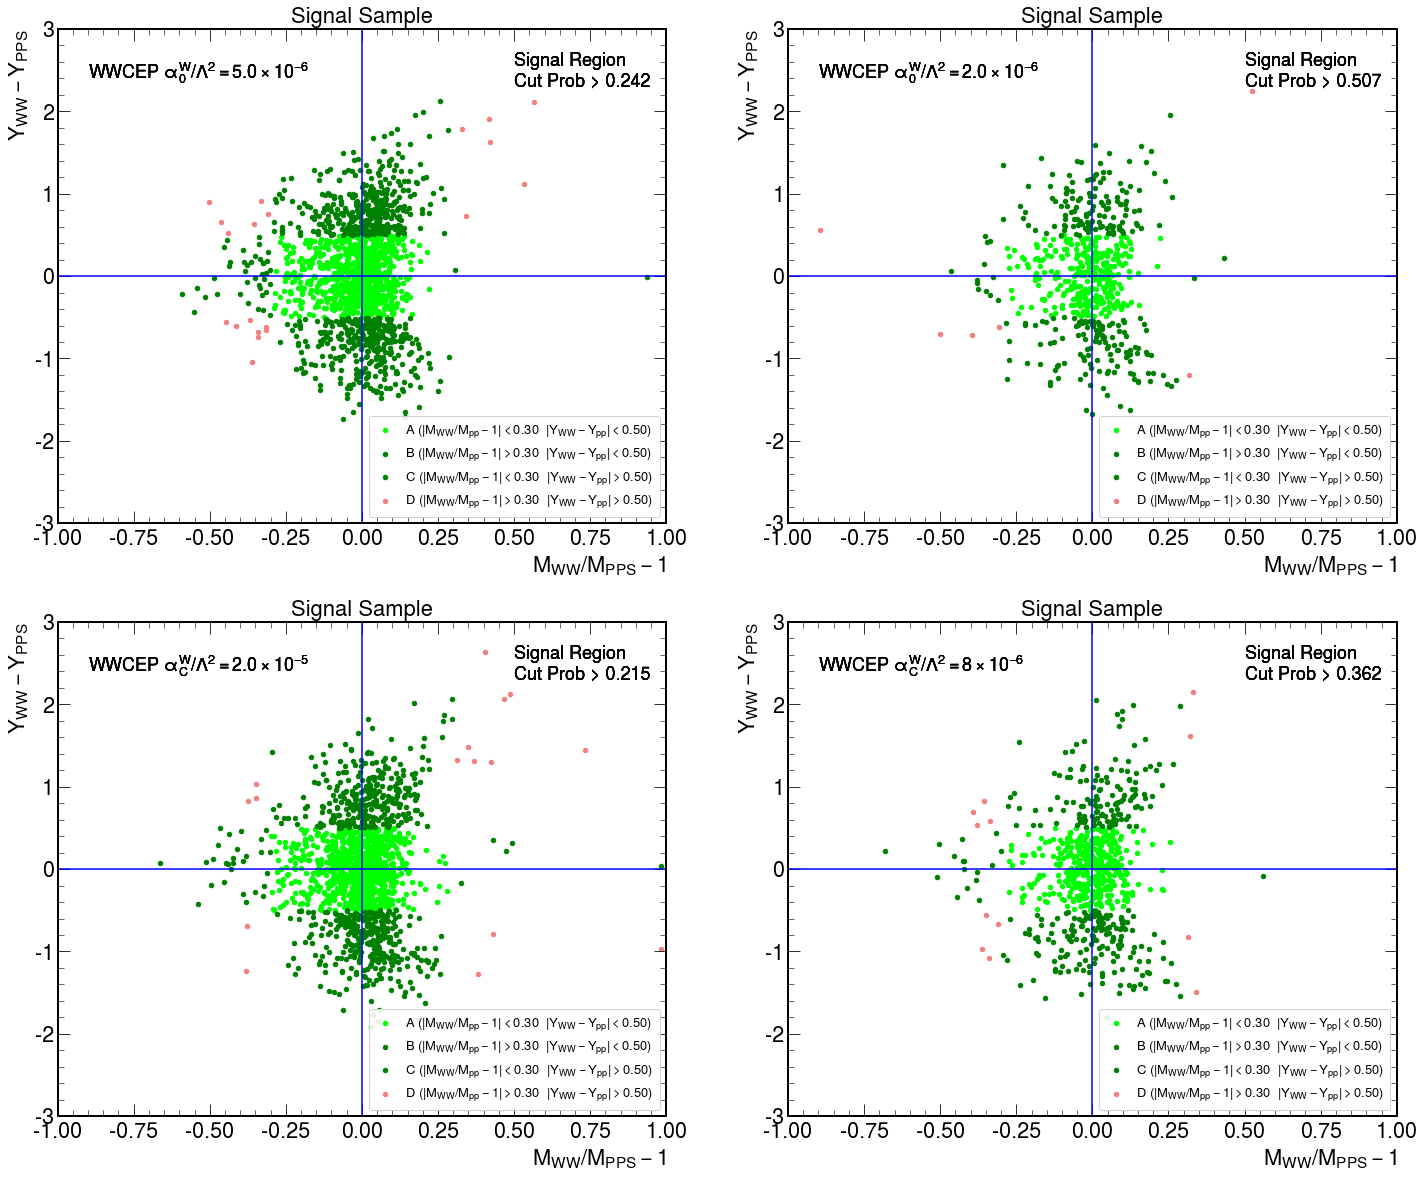

In [109]:
labels_samples = [
    r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $',
    r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $',
    r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=2.0 \times 10^{-5}$',
    r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=8 \times 10^{-6}$' ]

nrows_ = ( int( len(labels_signals)/2 ) + 1 if ( len(labels_signals) % 2 ) > 0 else  int( len(labels_signals)/2 ) )
fig, axes = plt.subplots( nrows_, 2, figsize=(24,nrows_*10) )

row_ = 0
col_ = 0
for label_ in labels_signals:
    print ( label_ )
    
    df_signals_protons_multiRP_events_sigreg[ label_ ]['shiftedRatioMWW_MX'] = df_signals_protons_multiRP_events_sigreg[ label_ ]['Mww/Mx'] - 1
    msk_sig_cut1 = ( np.abs( df_signals_protons_multiRP_events_sigreg[ label_ ][ "shiftedRatioMWW_MX" ] ) <= 0.30 )
    msk_sig_cut2 = ( np.abs( df_signals_protons_multiRP_events_sigreg[ label_ ][ "Yww_Yx" ] ) <= 0.50 )
    msk_sig_A =  msk_sig_cut1 &  msk_sig_cut2
    msk_sig_B = ~msk_sig_cut1 &  msk_sig_cut2
    msk_sig_C =  msk_sig_cut1 & ~msk_sig_cut2
    msk_sig_D = ~msk_sig_cut1 & ~msk_sig_cut2

    n_events_sig   = np.sum( df_signals_protons_multiRP_events_sigreg[ label_ ][ "PUWeight" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ "Norm_MC" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ "weight" ] )
    err_n_events_sig = np.sqrt( np.sum( np.square( df_signals_protons_multiRP_events_sigreg[ label_ ][ "PUWeight" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ "Norm_MC" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ "weight" ] ) ) )
    n_events_sig_A = np.sum( df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_A ][ "PUWeight" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_A ][ "Norm_MC" ]  * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_A ][ "weight" ] )
    err_n_events_sig_A = np.sqrt( np.sum( np.square( df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_A ][ "PUWeight" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_A ][ "Norm_MC" ]  * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_A ][ "weight" ]  ) ) )
    n_events_sig_B = np.sum( df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_B ][ "PUWeight" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_B ][ "Norm_MC" ] *df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_B ][ "weight" ] )
    err_n_events_sig_B = np.sqrt( np.sum( np.square( df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_B ][ "PUWeight" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_B ][ "Norm_MC" ] *df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_B ][ "weight" ] ) ) )
    n_events_sig_C = np.sum( df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_C ][ "PUWeight" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_C ][ "Norm_MC" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_C ][ "weight" ] )
    err_n_events_sig_C = np.sqrt( np.sum( np.square( df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_C ][ "PUWeight" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_C ][ "Norm_MC" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_C ][ "weight" ] ) ) )
    n_events_sig_D = np.sum( df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_D ][ "PUWeight" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_D ][ "Norm_MC" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_D ][ "weight" ] )
    err_n_events_sig_D = np.sqrt( np.sum( np.square(  df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_D ][ "PUWeight" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_D ][ "Norm_MC" ] * df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_D ][ "weight" ] ) ) )

    print ( "Number of events: {} +/- {}".format( n_events_sig, err_n_events_sig ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_sig_A, err_n_events_sig_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_sig_B, err_n_events_sig_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_sig_C, err_n_events_sig_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_sig_D, err_n_events_sig_D ) )

    x_min = -1.0
    x_max =  1.0
    y_min = -3.0
    y_max =  3.0
    x_center = ( x_min + x_max ) / 2.
    y_center = ( y_min + y_max ) / 2.

    print ( row_, col_ )
    axes[ row_, col_ ].plot( (x_min,x_max), (y_center,y_center), color='blue' )
    axes[ row_, col_ ].plot( (x_center,x_center), (y_min,y_max), color='blue' )
    if np.sum( msk_sig_A ) > 0:
        label_str_ = r"A ($|M_{WW} / M_{pp} - 1| < 0.30$  $|Y_{WW} - Y_{pp}| < 0.50$)"
        df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_A ].plot( "shiftedRatioMWW_MX", "Yww_Yx", 'scatter', ax=axes[ row_, col_ ], color='lime', label = label_str_ )
    if np.sum( msk_sig_B ) > 0:
        label_str_ = r"B ($|M_{WW} / M_{pp} - 1| > 0.30$  $|Y_{WW} - Y_{pp}| < 0.50$)"
        df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_B ].plot( "shiftedRatioMWW_MX", "Yww_Yx", 'scatter', ax=axes[ row_, col_ ], color='green', label = label_str_ )
    if np.sum( msk_sig_C ) > 0:
        label_str_ = r"C ($|M_{WW} / M_{pp} - 1| < 0.30$  $|Y_{WW} - Y_{pp}| > 0.50$)"
        df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_C ].plot( "shiftedRatioMWW_MX", "Yww_Yx", 'scatter', ax=axes[ row_, col_ ], color='green', label = label_str_ )
    if np.sum( msk_sig_D ) > 0:
        label_str_ = r"D ($|M_{WW} / M_{pp} - 1| > 0.30$  $|Y_{WW} - Y_{pp}| > 0.50$)"
        df_signals_protons_multiRP_events_sigreg[ label_ ][ msk_sig_D ].plot( "shiftedRatioMWW_MX", "Yww_Yx", 'scatter', ax=axes[ row_, col_ ], color='lightcoral', label = label_str_ )
    #title_str_ = "{}\n$\\rm{{Prob.}} > {:.2f}$".format( labels_samples[ label_ ], prob_cut )
    #title_str_ = r"{}".format( title_str_ )
    #axes[ row_, col_ ].text( 0.70, 0.92, title_str_, horizontalalignment='left', verticalalignment='center', transform=axes[ row_, col_ ].transAxes, fontsize=18 )
    axes[ row_, col_ ].set_xlim(x_min, x_max)
    axes[ row_, col_ ].set_ylim(y_min, y_max)
    axes[ row_, col_ ].set_xlabel( r"$M_{WW} / M_{PPS} - 1$", fontsize=22 )
    axes[ row_, col_ ].set_ylabel( r"$Y_{WW} - Y_{PPS}$", fontsize=22 )
    axes[ row_, col_ ].set_title( "Signal Sample", fontsize=22 )
    axes[ 0 , 0].text( -0.9, 2.4 , labels_samples[0], fontsize=18)
    axes[ 0 , 0].text( 0.5, 2.3 , 'Signal Region\nCut Prob > {:2.3f}'.format(best_cut(y_test8,predict_proba_LGBM8_binary_logloss_scale_pos_weight)), fontsize=18)
    axes[ 0 , 1].text( -0.9, 2.4 , labels_samples[1], fontsize=18)
    axes[ 0 , 1].text( 0.5, 2.3 , 'Signal Region\nCut Prob > {:2.3f}'.format(best_cut(y_test7,predict_proba_LGBM7_binary_logloss_scale_pos_weight)), fontsize=18)
    axes[ 1 , 0].text( -0.9, 2.4 , labels_samples[2], fontsize=18)
    axes[ 1 , 0].text( 0.5, 2.3 , 'Signal Region\nCut Prob > {:2.3f}'.format(best_cut(y_test1,predict_proba_LGBM1_binary_logloss_scale_pos_weight)), fontsize=18)
    axes[ 1 , 1].text( -0.9, 2.4 , labels_samples[3], fontsize=18)
    axes[ 1 , 1].text( 0.5, 2.3 , 'Signal Region\nCut Prob > {:2.3f}'.format(best_cut(y_test4,predict_proba_LGBM4_binary_logloss_scale_pos_weight)), fontsize=18)
    axes[ 0 , 0].legend(loc='lower right', fontsize=13, framealpha=0.9, frameon=True, fancybox=True)
    axes[ 0 , 1].legend(loc='lower right', fontsize=13, framealpha=0.9, frameon=True, fancybox=True)
    axes[ 1 , 0].legend(loc='lower right', fontsize=13, framealpha=0.9, frameon=True, fancybox=True)
    axes[ 1 , 1].legend(loc='lower right', fontsize=13, framealpha=0.9, frameon=True, fancybox=True)
    plt.savefig(pwd_savefig+'multiRP_events_sigreg_SIGNAL_SignalRegion.pdf')
    col_ += 1
    if col_ >= 2:
        row_ += 1
        col_  = 0

## Para os dados na região de background

/home/matheus/miniconda3/envs/root_/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/matheus/miniconda3/envs/root_/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


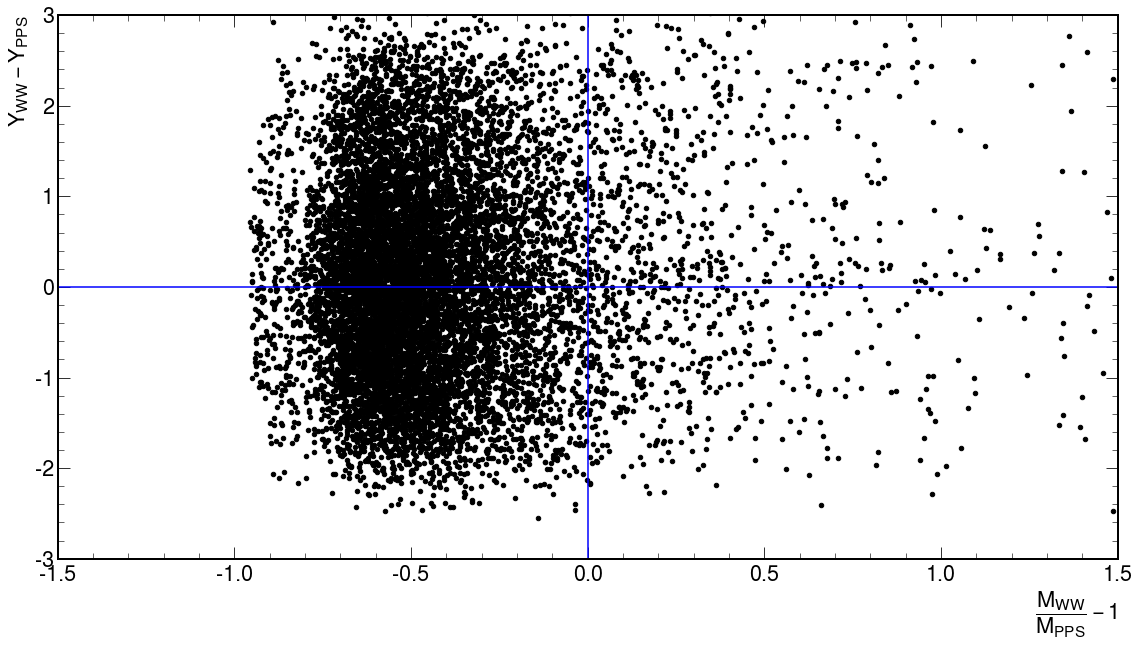

In [72]:
df_protons_multiRP_data_events_bkgreg = data_set_dados_multirp[ data_set_dados_multirp['class_predict8'] == 0 ]
df_protons_multiRP_data_events_bkgreg['shiftedRatioMWW_MX'] =  df_protons_multiRP_data_events_bkgreg[ "Mww/Mx" ] - 1 
df_protons_multiRP_data_events_bkgreg['diffYWW_YX'] = df_protons_multiRP_data_events_bkgreg['Yww_Yx'] 

x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(19,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='blue' )
plt.plot( (x_center,x_center), (y_min,y_max), color='blue' )
ax = plt.gca()
df_protons_multiRP_data_events_bkgreg.plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='black' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel( r"$\dfrac{M_{WW}}{M_{PPS}} - 1$", fontsize=22 )
plt.ylabel( r"$Y_{WW} - Y_{PPS}$", fontsize=22 )
plt.savefig( pwd_savefig+'ABCD_multiRP_data_events_BACKGROUND_REGION.pdf' )
#plt.show()
#plt.close()

## Para os Dados na região de Signal

/home/matheus/miniconda3/envs/root_/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/matheus/miniconda3/envs/root_/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


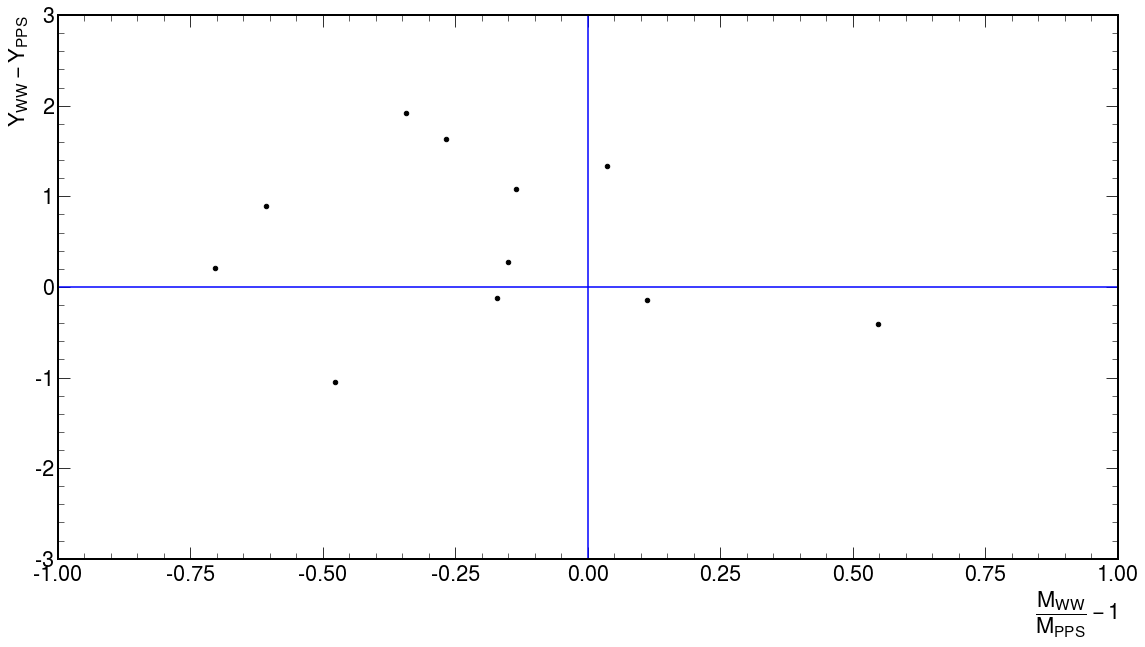

In [66]:
df_protons_multiRP_data_events_bkgreg = data_set_dados_multirp[ data_set_dados_multirp['class_predict8'] == 1 ]
df_protons_multiRP_data_events_bkgreg['shiftedRatioMWW_MX'] =  df_protons_multiRP_data_events_bkgreg[ "Mww/Mx" ] - 1 
df_protons_multiRP_data_events_bkgreg['diffYWW_YX'] = df_protons_multiRP_data_events_bkgreg['Yww_Yx'] 

x_min = -1.
x_max =  1.
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(19,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='blue' )
plt.plot( (x_center,x_center), (y_min,y_max), color='blue' )
ax = plt.gca()
df_protons_multiRP_data_events_bkgreg.plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='black' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel( r"$\dfrac{M_{WW}}{M_{PPS}} - 1$", fontsize=22 )
plt.ylabel( r"$Y_{WW} - Y_{PPS}$", fontsize=22 )
plt.savefig( pwd_savefig+'ABCD_multiRP_data_events_SIGNAL_REGION.pdf' )
#plt.show()
#plt.close()

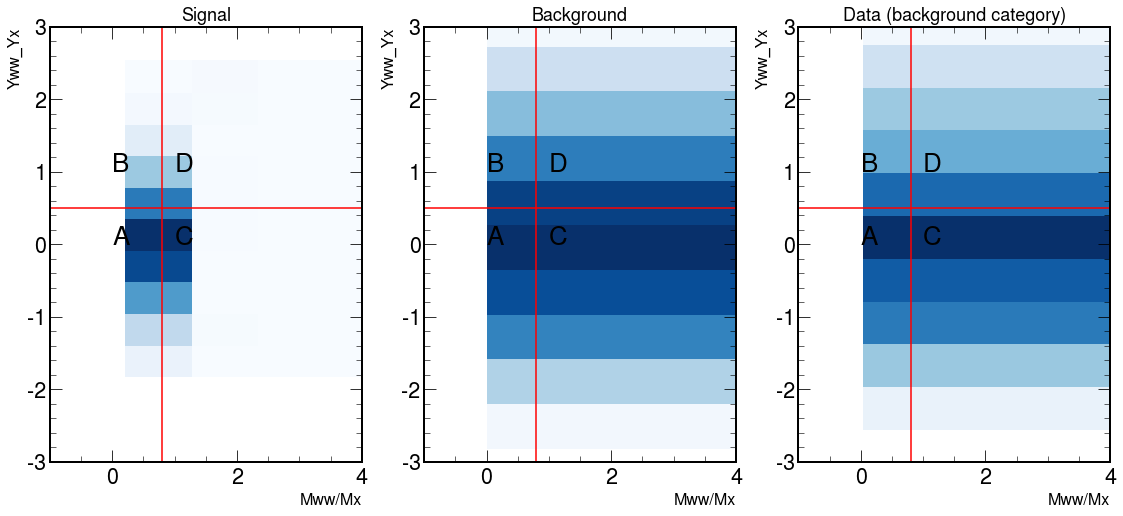

In [53]:
v1='Mww/Mx'
cut_v1=0.8
range_v1=(-1,4)

v2='Yww_Yx'
cut_v2=0.5
range_v2=(-3,3)

def doScatter(df,label, ax):
    ax.hist2d(df[v1],df[v2], cmap='Blues')
    ax.set_xlim(*range_v1)
    ax.set_ylim(*range_v2)
    ax.set_xlabel(v1, fontsize = 16)
    ax.set_ylabel(v2, fontsize = 16)
    ax.plot([cut_v1,cut_v1],[range_v2[0],range_v2[1]],color='red')
    ax.plot([range_v1[0],range_v1[1]],[cut_v2,cut_v2],color='red')
    #ax.text(0.2,0.9,label, transform=ax.transAxes)
    ax.set_title(label, fontsize = 18)
    ax.text(0, 0,'A')
    ax.text(0, 1,'B')
    ax.text(1,0,'C')
    ax.text(1,1,'D')

    
fig, ax = plt.subplots( 1, 3, figsize = (19,8) )
doScatter( ANOMALO8,'Signal', ax[0] )
doScatter( data_set_back_multirp,'Background', ax[1] )
doScatter( data_set_dados_multirp[data_set_dados_multirp['class_predict8'] == 0 ],'Data (background category)', ax[2] )
plt.savefig( pwd_savefig+'ABCD_methods_Anomalo8.pdf' )
#plt.show()
#plt.close()

In [54]:
def getABCDYields(df):
    
    """obtém os rendimentos nas diferentes regiões abcd"""

    mask_a=(df[v1]<cut_v1) &(df[v2]<cut_v2)
    mask_b=(df[v1]>cut_v1) &(df[v2]<cut_v2)
    mask_c=(df[v1]<cut_v1) &(df[v2]>cut_v2)
    mask_d=(df[v1]>cut_v1) &(df[v2]>cut_v2)
    
    yields={'A':df[mask_a].shape[0],
            'B':df[mask_b].shape[0],
            'C':df[mask_c].shape[0],
            'D':df[mask_d].shape[0]}

    return yields
 
def getABCDPrediction(df):
    
    """
    partindo dos rendimentos nas diferentes regiões, aplica-se a fórmula ABCD
    retorna o número de eventos observados na região do sinal e o número estimado de eventos
    """
    
    yields = getABCDYields( df )
    
    return yields['A'],yields['B']*yields['C']/yields['D']


In [55]:
print( 'Data (background category)' )
nA,nAest=getABCDPrediction( data_set_dados_multirp[data_set_dados_multirp[ 'class_predict8' ] == 0 ] )
print('\n Número de eventos observados na região de Sinal=%d \n Número de eventos estimados=%3.1f bias=%3.3f'%( nA, nAest, nAest / nA ), '\n' )

print( 'Data (background)' )
nA,nAest=getABCDPrediction( data_set_back_multirp )
print('\n Número de eventos observados na região de Sinal=%d \n Número de eventos estimados=%3.1f bias=%3.3f'%( nA, nAest, nAest / nA ), '\n' )

# calcular o erro sistemático do teste de fechamento em segundo plano 
SYS_ERROR = '%2.2f'%( nAest/nA if ( nAest > nA ) else nA/nAest )
print( 'erro sistemático = '+SYS_ERROR, '\n' )

Data (background category)

 Número de eventos observados na região de Sinal=6091 
 Número de eventos estimados=5280.7 bias=0.867 

Data (background)

 Número de eventos observados na região de Sinal=135509 
 Número de eventos estimados=131154.6 bias=0.968 

erro sistemático = 1.03 



In [56]:
print('Iniciando a análise estatística \n')

import ROOT

samples={'bkg':data_set_back_multirp,
         'sig':ANOMALO8,
         'data_obs':data_set_dados_multirp}

# loop sobre as amostras
# obter rendimentos nas diferentes regiões 
yields_abcd={}
for df_name,df in samples.items():    
    yields_abcd[df_name]=getABCDYields(df)

# aplicar um fator de escala à estimativa de fundo de forma que corresponda aos dados na região D 
bkgSF=yields_abcd['data_obs']['D']/yields_abcd['bkg']['D']
for x in yields_abcd['bkg']: 
    yields_abcd['bkg'][x]=bkgSF*yields_abcd['bkg'][x]


print('A estimativa de fundo foi dimensionada por %3.3f'%bkgSF, '\n')

# aplicar um fator de escala ao sinal para normalizar por luminosidade 
SingleMuon_Run2016B = 4.55
SingleMuon_Run2016C = 1.59
SingleMuon_Run2016G = 3.65
Luminosidade        = SingleMuon_Run2016B + SingleMuon_Run2016C + SingleMuon_Run2016G 

cross_section_SM       = 40.41*0.17
cross_section_ANOMALO1 = 166.1*0.17 
cross_section_ANOMALO2 = 41.90*0.17
cross_section_ANOMALO3 = 48.75*0.17
cross_section_ANOMALO4 = 61.14*0.17
cross_section_ANOMALO5 = 41.58*0.17
cross_section_ANOMALO6 = 44.93*0.17
cross_section_ANOMALO7 = 58.18*0.17 
cross_section_ANOMALO8 = 150.3*0.17

sigSF = cross_section_ANOMALO8 * Luminosidade # cross section and luminosity

# normalize o sinal para o número total de eventos
sigSF=sigSF/ANOMALO8.shape[0]

for x in yields_abcd['sig']: 
    yields_abcd['sig'][x]=sigSF*yields_abcd['sig'][x]


print('A estimativa do sinal foi dimensionada por %3.3f'%sigSF, '\n')

Iniciando a análise estatística 

Welcome to JupyROOT 6.22/02
A estimativa de fundo foi dimensionada por 0.018 

A estimativa do sinal foi dimensionada por 0.127 



In [57]:
# template para a forma da distribuição a ser analisada 
shapeH=ROOT.TH1F('shape','shape',1,0,1)
shapeH.SetDirectory(0)

# open the output file
fOut=ROOT.TFile.Open('shapes.root','RECREATE')

# loop sobre as amostras
for df_name in samples:    
    
    # salve as contagens no histograma e armazene-as no arquivo 
    for region in yields_abcd[df_name]:
        shape=shapeH.Clone('{}_{}'.format(df_name,region))
        shape.SetBinContent(1,yields_abcd[df_name][region])
        shape.SetDirectory(fOut)
        shape.Write()

print('Writes: '+fOut.GetName())
fOut.Close()

shapeH.Delete()

Writes: shapes.root


# Datacard

In [58]:
print('Inciando o Datacard\n')

dc=open('datacard.dat','w')

dc.write('imax *  number of channels\n')
dc.write('jmax *  number of processes -1\n')
dc.write('kmax *  number of nuisance parameters (sources of systematical uncertainties)\n')
dc.write('-------\n')

#spell out out the shapes are stored in the ROOT file
dc.write('shapes * * shapes.root $PROCESS_$CHANNEL $PROCESS_$CHANNEL_$SYSTEMATIC\n')

#add the data observations
dc.write('bin            A   B    C    D\n')
dc.write('observation  {0} {1} {2} {3}\n'.format(yields_abcd['data_obs']['A'],
                                                 yields_abcd['data_obs']['B'],
                                                 yields_abcd['data_obs']['C'],
                                                 yields_abcd['data_obs']['D']))
dc.write('-------\n')

#add the expectations for signal and background
dc.write('bin         A               A            B           B          C           C            D          D\n')
dc.write('process     sig             bkg          sig         bkg        sig         bkg          sig        bkg\n')
dc.write('process     0               1            0           1          0           1            0          1\n')
dc.write('rate        {0:.3f}      {1:.3f}      {2:.3f}     {3:.3f}     {4:.3f}     {5:.3f}     {6:.3f}     {7:.3f}\n'.format(yields_abcd['sig']['A'],
                                                                                                  yields_abcd['bkg']['A'],
                                                                                                  yields_abcd['sig']['B'],
                                                                                                  yields_abcd['bkg']['B'],
                                                                                                  yields_abcd['sig']['C'],
                                                                                                  yields_abcd['bkg']['C'],
                                                                                                  yields_abcd['sig']['D'],
                                                                                                  yields_abcd['bkg']['D'],
                                                                                                 ))
dc.write('-------\n')

#add 2.7% unc. on luminosity
dc.write('lumi lnN 1.027 - 1.027 - 1.027 - 1.027 -\n')
if '1.00' not in SYS_ERROR: 
    dc.write('syst_bkg lnN - '+SYS_ERROR+' - - - - - -\n')

#spell-out the ABCD method
dc.write('alpha rateParam A bkg (@0*@1/@2) beta,gamma,delta\n')
dc.write('beta  rateParam B bkg {}\n'.format(yields_abcd['bkg']['B']))
dc.write('gamma rateParam C bkg {}\n'.format(yields_abcd['bkg']['C']))
dc.write('delta rateParam D bkg {}\n'.format(yields_abcd['bkg']['D']))
         
#all done
dc.close()

print('datacard.dat is ready to be used with combine\n\n')

import os

_ = os.system('cat datacard.dat')

Inciando o Datacard

datacard.dat is ready to be used with combine


imax *  number of channels
jmax *  number of processes -1
kmax *  number of nuisance parameters (sources of systematical uncertainties)
-------
shapes * * shapes.root $PROCESS_$CHANNEL $PROCESS_$CHANNEL_$SYSTEMATIC
bin            A   B    C    D
observation  6093 1207 3304 754
-------
bin         A               A            B           B          C           C            D          D
process     sig             bkg          sig         bkg        sig         bkg          sig        bkg
process     0               1            0           1          0           1            0          1
rate        18.586      2407.431      171.473     1244.266     3.946     1411.976     56.139     754.000
-------
lumi lnN 1.027 - 1.027 - 1.027 - 1.027 -
syst_bkg lnN - 1.03 - - - - - -
alpha rateParam A bkg (@0*@1/@2) beta,gamma,delta
beta  rateParam B bkg 1244.2661106005985
gamma rateParam C bkg 1411.9756367663344
delta rateParam D b

In [153]:
def plots_results( var, label_x, range_ ):
    
    fig, ax = plt.subplots( 2,2, figsize=(19,13) )
    var = var
    label_x = label_x
    range_ = range_
    bins = 20

    num = 8
    df_background8 = [ DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ][var], 
                      DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ][var] ]

    df_background_weight8 = [ DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ]['weight'], 
                      DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ]['weight'] ,
                      DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ]['weight'],
                      DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ]['weight'],
                      DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ]['weight'],
                      DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ]['weight'] ]
    num = 7
    df_background7 = [ DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ][var], 
                      DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ][var] ]

    df_background_weight7 = [ DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ]['weight'], 
                      DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ]['weight'] ,
                      DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ]['weight'],
                      DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ]['weight'],
                      DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ]['weight'],
                      DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ]['weight'] ]

    num = 1
    df_background1 = [ DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ][var], 
                      DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ][var] ]

    df_background_weight1 = [ DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ]['weight'], 
                      DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ]['weight'] ,
                      DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ]['weight'],
                      DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ]['weight'],
                      DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ]['weight'],
                      DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ]['weight'] ]

    num = 4
    df_background4 = [ DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ][var], 
                      DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ][var],
                      DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ][var] ]

    df_background_weight4 = [ DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_DrellYan[ DataSet_multiRP_DrellYan['class_predict{}'.format(num)] == 1 ]['weight'], 
                      DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_QCD[ DataSet_multiRP_QCD['class_predict{}'.format(num)] == 1 ]['weight'] ,
                      DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_single_top[ DataSet_multiRP_single_top['class_predict{}'.format(num)] == 1 ]['weight'],
                      DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_TTbar[ DataSet_multiRP_TTbar['class_predict{}'.format(num)] == 1 ]['weight'],
                      DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_VV_inclusivo[ DataSet_multiRP_VV_inclusivo['class_predict{}'.format(num)] == 1 ]['weight'],
                      DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ]['PUWeight'] * DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ]['Norm_MC'] * DataSet_multiRP_WJets[ DataSet_multiRP_WJets['class_predict{}'.format(num)] == 1 ]['weight'] ]



    label_back = [ 'Drell-Yan', 'QCD', 'Single Top', r'$t\bar{t}$', '(WW,WZ,ZZ) Inclusive', 'W+Jets' ]

    ax[0,0].hist( df_background8, stacked = True, bins = bins, range = range_, histtype = 'bar', label = label_back, weights = df_background_weight8 )
    ax[0,0].hist( ANOMALO8[ANOMALO8['class_predict'] == 1 ][var], ls='-', linewidth=2.5, bins = bins, range = range_, histtype = 'step', color = 'blue', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5 \times 10^{-6} $', weights = ANOMALO8[ANOMALO8['class_predict'] == 1 ]['PUWeight'] * ANOMALO8[ANOMALO8['class_predict'] == 1 ]['Norm_MC'] * ANOMALO8[ANOMALO8['class_predict'] == 1 ]['weight'] / 10)
    ax[0,0].legend(loc='best', fontsize = 12)
    ax[0,0].set_xlabel(label_x, fontsize = 15)
    ax[0,0].set_ylabel('Events', fontsize = 15)

    ax[1,0].hist( df_background7, stacked = True, bins = bins, range = range_, histtype = 'bar', label = label_back, weights = df_background_weight7 )
    ax[1,0].hist( ANOMALO7[ANOMALO7['class_predict'] == 1 ][var], ls='-', linewidth=2.5, bins = bins, range = range_, histtype = 'step', color = 'blue', label =  r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', weights = ANOMALO7[ANOMALO7['class_predict'] == 1 ]['PUWeight'] * ANOMALO7[ANOMALO7['class_predict'] == 1 ]['Norm_MC'] * ANOMALO7[ANOMALO7['class_predict'] == 1 ]['weight'] / 10)
    ax[1,0].legend(loc='best', fontsize = 12)
    ax[1,0].set_xlabel(label_x, fontsize = 15)
    ax[1,0].set_ylabel('Events', fontsize = 15)

    ax[0,1].hist( df_background1, stacked = True, bins = bins, range = range_, histtype = 'bar', label = label_back, weights = df_background_weight1 )
    ax[0,1].hist( ANOMALO1[ANOMALO1['class_predict'] == 1 ][var], ls='-', linewidth=2.5, bins = bins, range = range_, histtype = 'step', color = 'blue', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=2.0 \times 10^{-5}$', weights = ANOMALO1[ANOMALO1['class_predict'] == 1 ]['PUWeight'] * ANOMALO1[ANOMALO1['class_predict'] == 1 ]['Norm_MC'] * ANOMALO1[ANOMALO1['class_predict'] == 1 ]['weight'] / 10)
    ax[0,1].legend(loc='best', fontsize = 12)
    ax[0,1].set_xlabel(label_x, fontsize = 15)
    ax[0,1].set_ylabel('Events', fontsize = 15)

    ax[1,1].hist( df_background4, stacked = True, bins = bins, range = range_, histtype = 'bar', label = label_back, weights = df_background_weight4 )
    ax[1,1].hist( ANOMALO4[ANOMALO4['class_predict'] == 1 ][var], ls='-', linewidth=2.5, bins = bins, range = range_, histtype = 'step', color = 'blue', label =  r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=8 \times 10^{-6}$', weights = ANOMALO4[ANOMALO4['class_predict'] == 1 ]['PUWeight'] * ANOMALO4[ANOMALO4['class_predict'] == 1 ]['Norm_MC'] * ANOMALO4[ANOMALO4['class_predict'] == 1 ]['weight'] / 10)
    ax[1,1].legend(loc='best', fontsize = 12)
    ax[1,1].set_xlabel(label_x, fontsize = 15)
    ax[1,1].set_ylabel('Events', fontsize = 15)

# Histogramas das variáveis após o treinamento e corte no discriminante

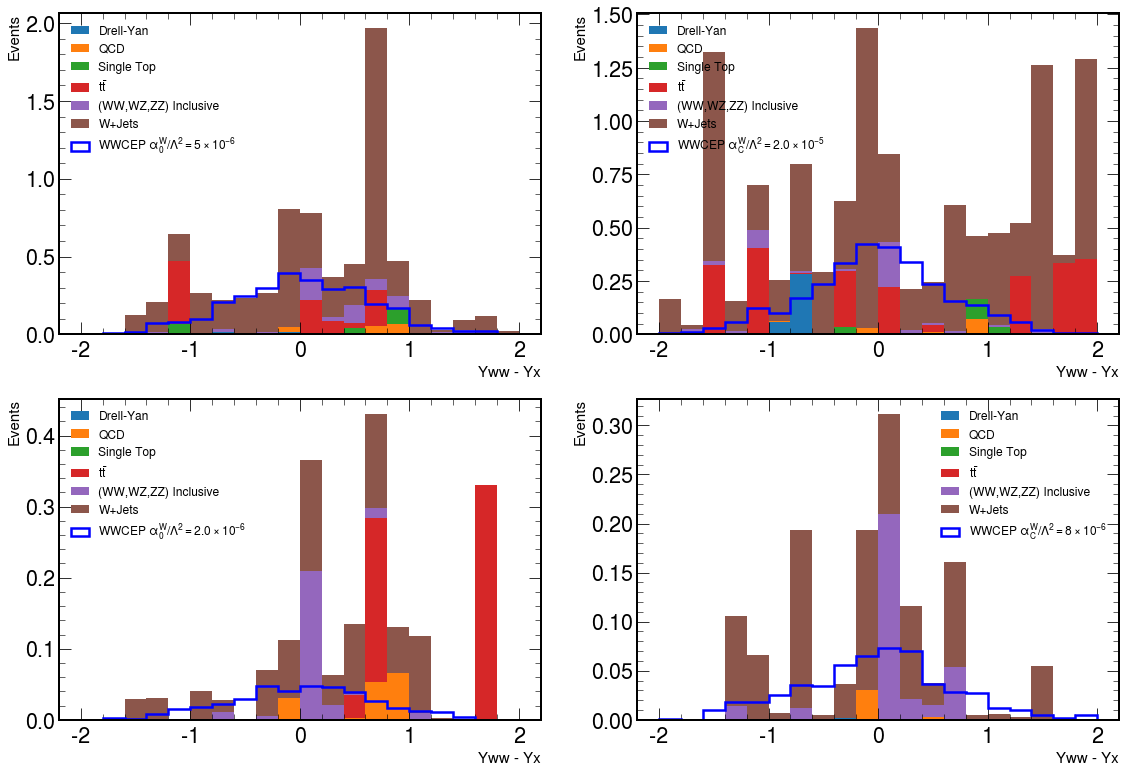

In [156]:
plots_results('Yww_Yx','Yww - Yx', (-2,2))

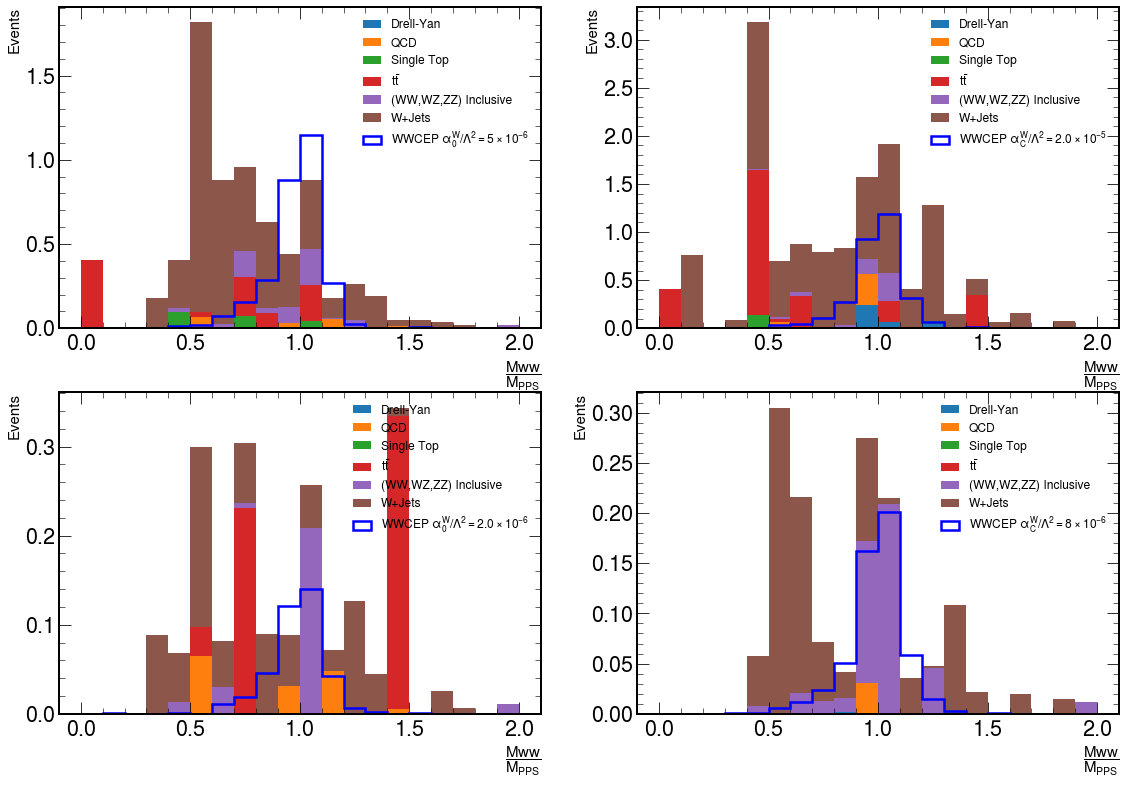

In [157]:
plots_results('Mww/Mx','$\dfrac{Mww}{M_{PPS}}$', (0,2))

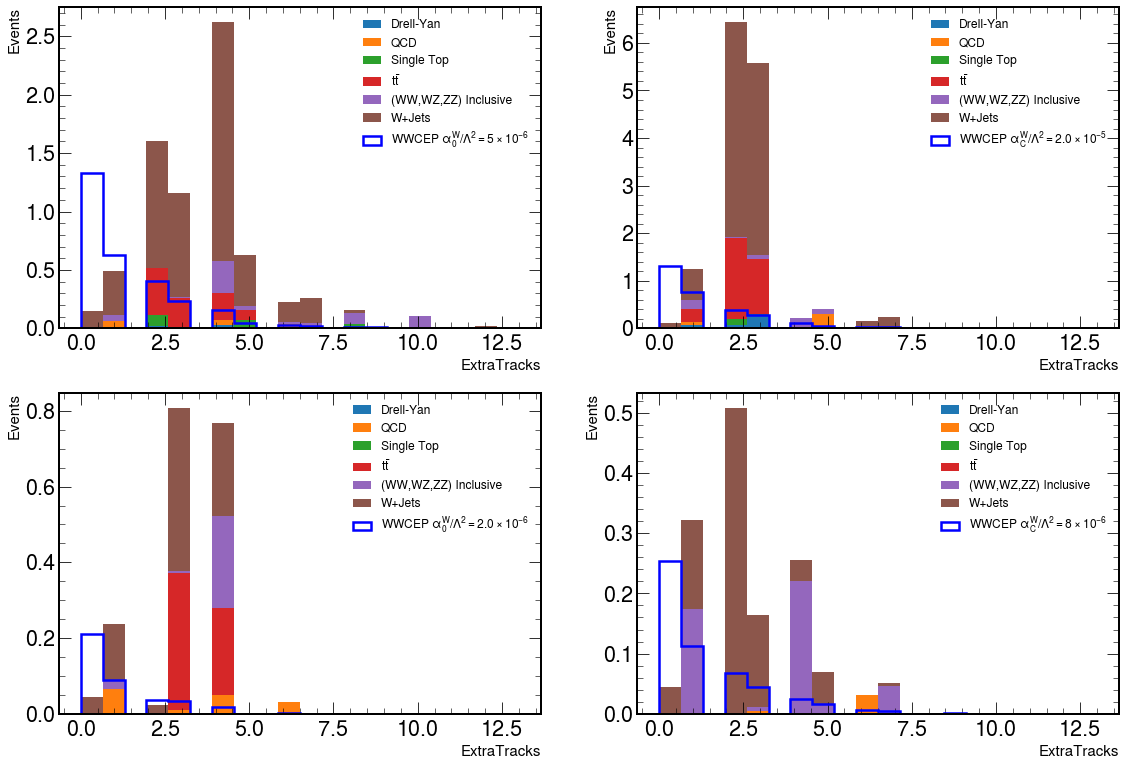

In [158]:
plots_results('ExtraTracks', 'ExtraTracks', (0,13))

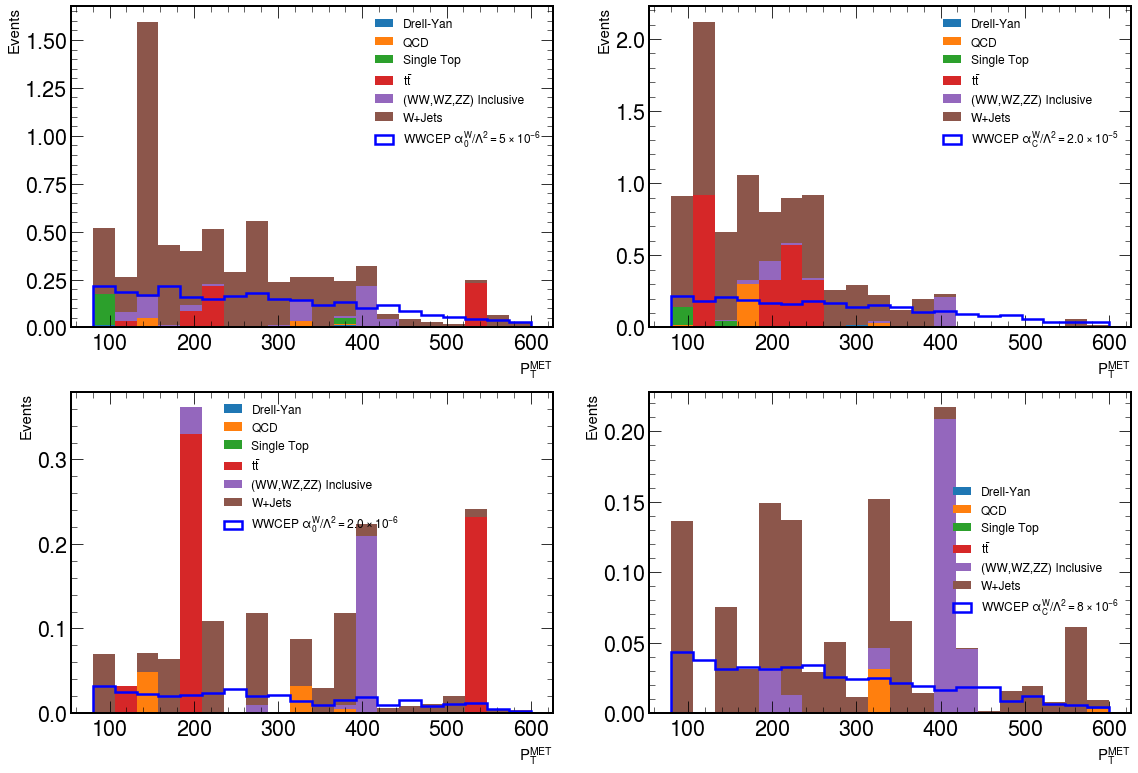

In [159]:
plots_results('METPt','$P_{T}^{MET}$', (80,600))

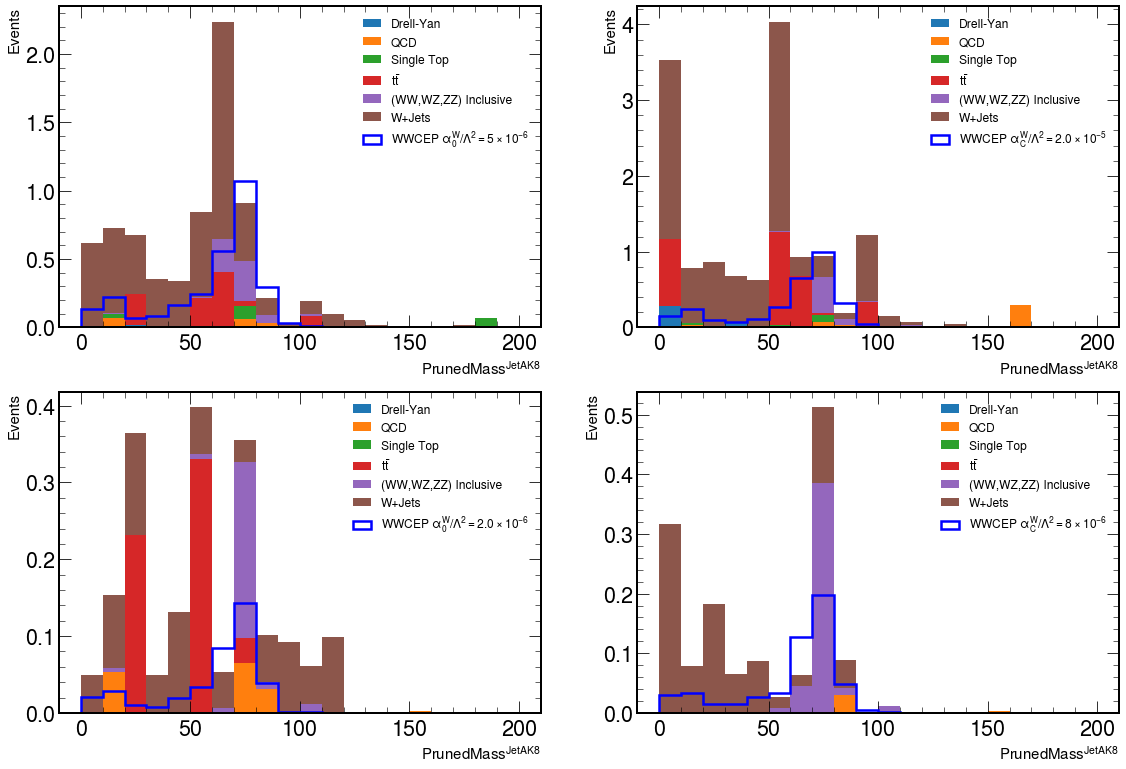

In [160]:
plots_results('jetAK8_prunedMass','$PrunedMass^{JetAK8}$', (0,200))

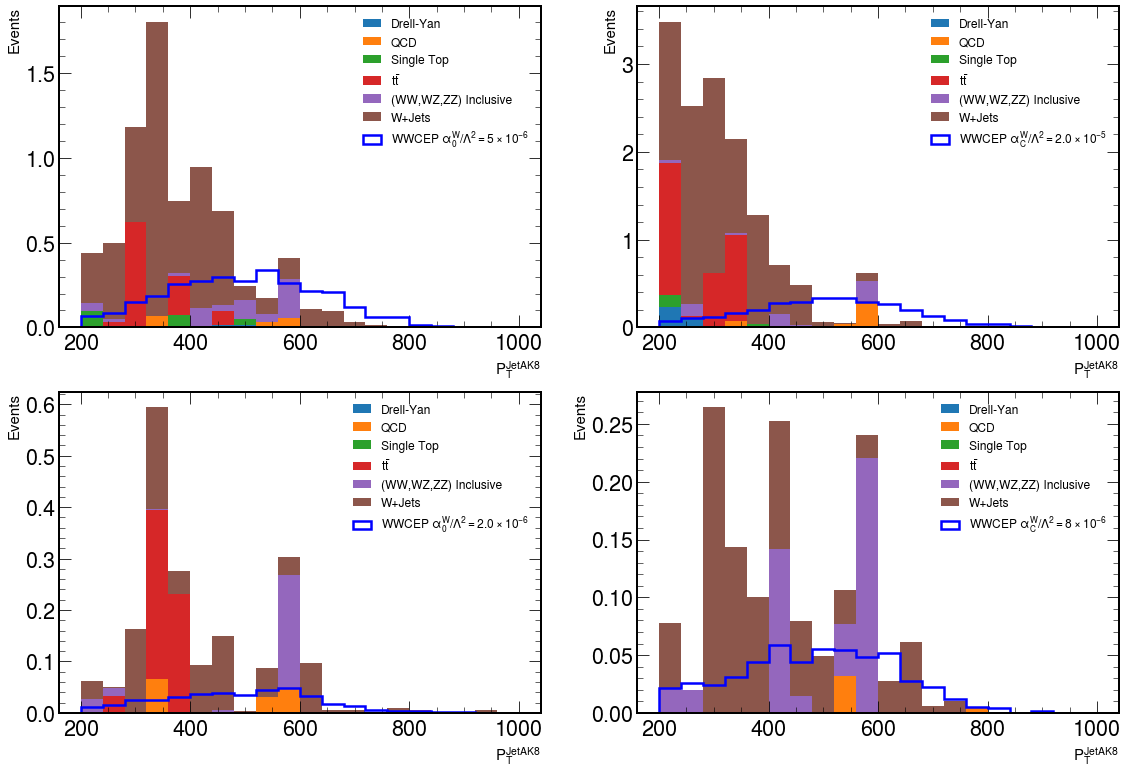

In [161]:
plots_results('jetAK8_pt','$P_{T}^{JetAK8}$', (200,1000))

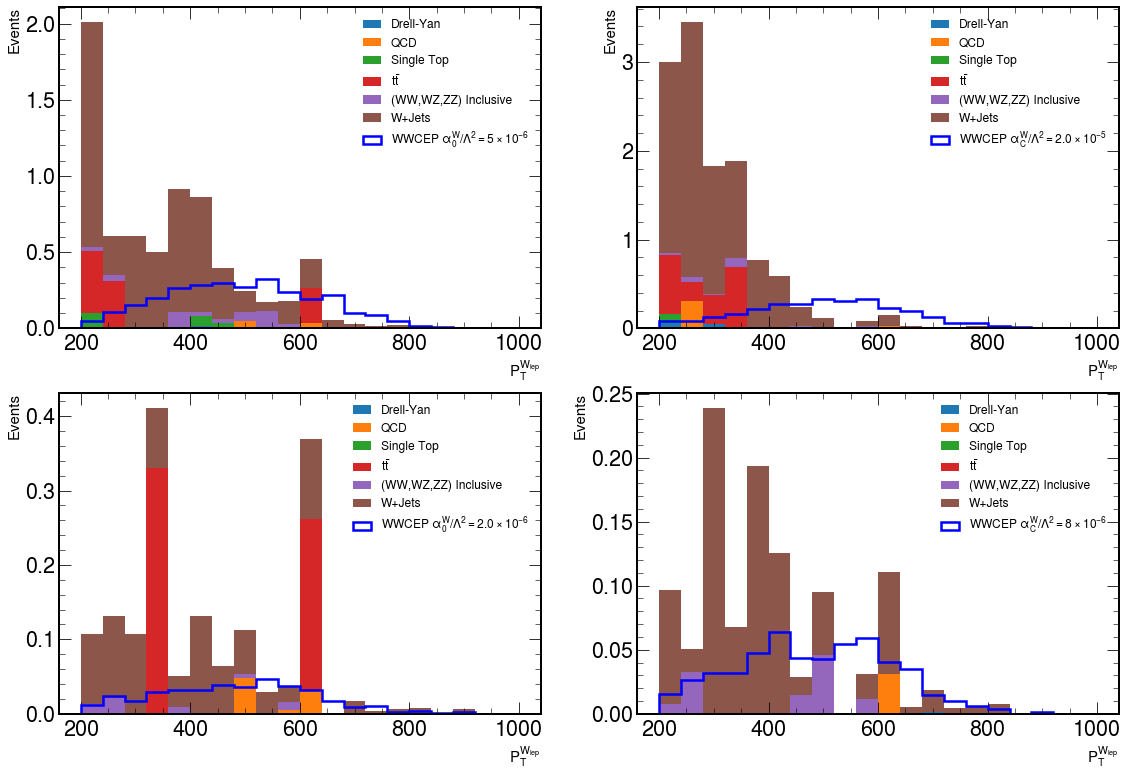

In [162]:
plots_results('Pt_W_lep', '$P_{T}^{W_{lep}}$', (200,1000))

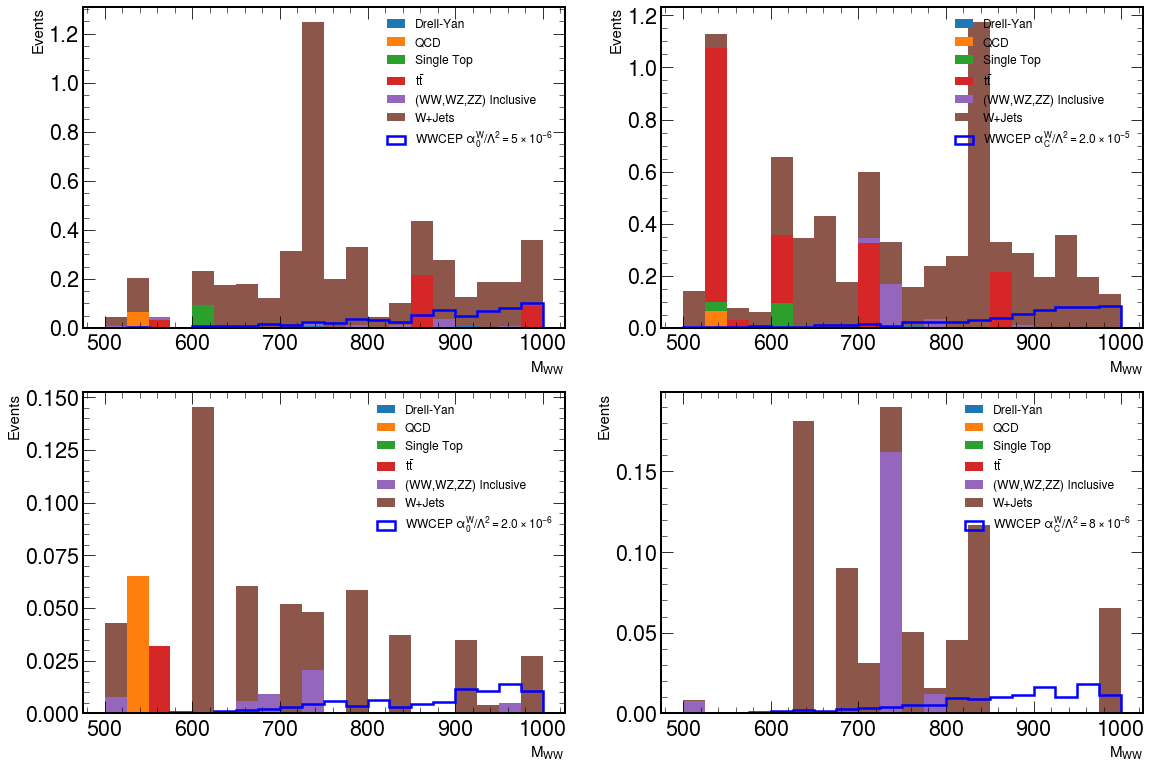

In [163]:
plots_results('Mww','$M_{WW}$', (500,1000))

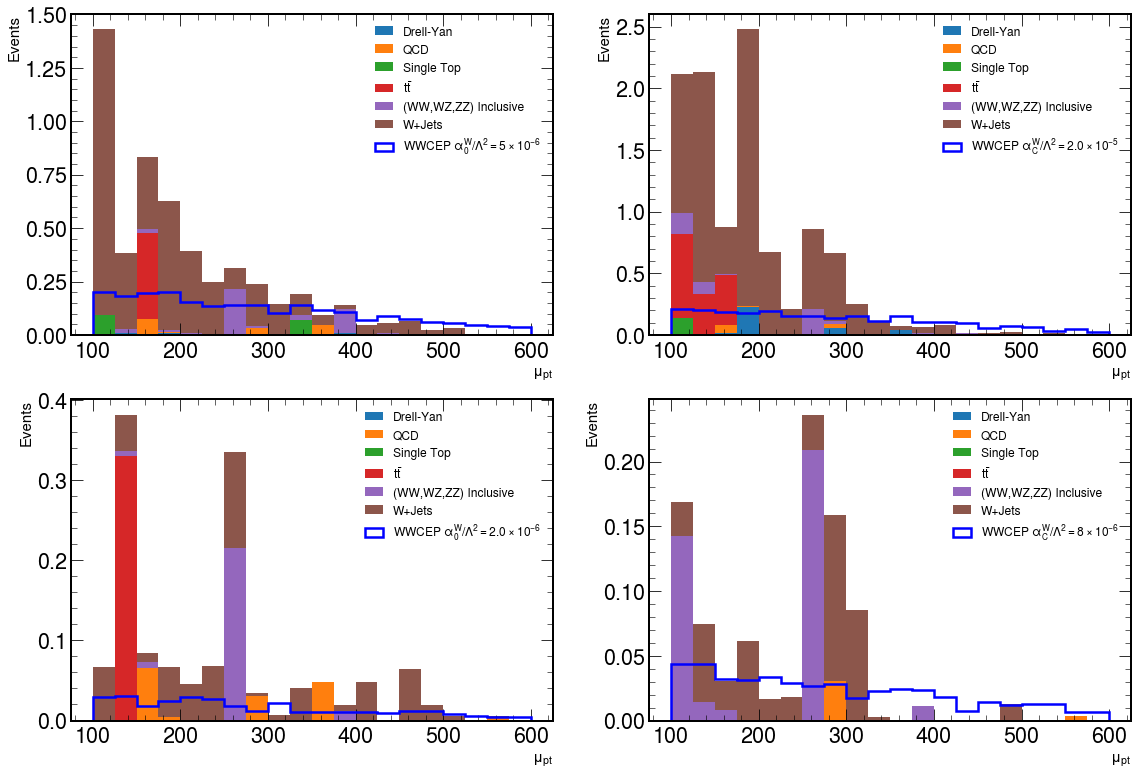

In [164]:
plots_results('muon_pt','$\mu_{pt}$',(100,600))